<a href="https://colab.research.google.com/github/saruthra/price-optima_ai/blob/main/PRICE_OPTIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("dynamic_pricing.csv")

# Head & Tail
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Last 5 rows:")
print(df.tail())

# Info
print("\n🔹 Dataset Info:")
print(df.info())

# Shape
print("\nShape (rows, cols):", df.shape)

# This checks the start, end, data types, and structure.

🔹 First 5 rows:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium          

In [2]:
print("\n🔹 Column Names:")
print(df.columns.tolist())

# Sanity: strip spaces, lowercase, replace bad chars
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\n🔹 Cleaned Column Names:")
print(df.columns.tolist())


#Ensures column names are clean and consistent.


🔹 Column Names:
['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

🔹 Cleaned Column Names:
['number_of_riders', 'number_of_drivers', 'location_category', 'customer_loyalty_status', 'number_of_past_rides', 'average_ratings', 'time_of_booking', 'vehicle_type', 'expected_ride_duration', 'historical_cost_of_ride']


In [3]:
print("\n🔹 Missing Values Count:")
print(df.isnull().sum())

print("\n🔹 Percentage of Missing Values:")
print((df.isnull().mean() * 100).round(2))

# Tells us how many missing values per column.


🔹 Missing Values Count:
number_of_riders           0
number_of_drivers          0
location_category          0
customer_loyalty_status    0
number_of_past_rides       0
average_ratings            0
time_of_booking            0
vehicle_type               0
expected_ride_duration     0
historical_cost_of_ride    0
dtype: int64

🔹 Percentage of Missing Values:
number_of_riders           0.0
number_of_drivers          0.0
location_category          0.0
customer_loyalty_status    0.0
number_of_past_rides       0.0
average_ratings            0.0
time_of_booking            0.0
vehicle_type               0.0
expected_ride_duration     0.0
historical_cost_of_ride    0.0
dtype: float64


In [4]:
print("\n🔹 Number of duplicate rows:", df.duplicated().sum())
# Helps remove redundancy.


🔹 Number of duplicate rows: 0


In [5]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()

print("\n🔹 Numerical Columns:", num_cols)
print("\n🔹 Categorical Columns:", cat_cols)
# Shows mean, std, min, max, percentiles.


🔹 Numerical Columns: ['number_of_riders', 'number_of_drivers', 'number_of_past_rides', 'average_ratings', 'expected_ride_duration', 'historical_cost_of_ride']

🔹 Categorical Columns: ['location_category', 'customer_loyalty_status', 'time_of_booking', 'vehicle_type']


In [6]:
print("\n🔹 Numerical Columns Description:")
print(df[num_cols].describe().T)
# Useful for plotting distributions


🔹 Numerical Columns Description:
                          count        mean         std        min  \
number_of_riders         1000.0   60.372000   23.701506  20.000000   
number_of_drivers        1000.0   27.076000   19.068346   5.000000   
number_of_past_rides     1000.0   50.031000   29.313774   0.000000   
average_ratings          1000.0    4.257220    0.435781   3.500000   
expected_ride_duration   1000.0   99.588000   49.165450  10.000000   
historical_cost_of_ride  1000.0  372.502623  187.158756  25.993449   

                                25%         50%         75%         max  
number_of_riders          40.000000   60.000000   81.000000  100.000000  
number_of_drivers         11.000000   22.000000   38.000000   89.000000  
number_of_past_rides      25.000000   51.000000   75.000000  100.000000  
average_ratings            3.870000    4.270000    4.632500    5.000000  
expected_ride_duration    59.750000  102.000000  143.000000  180.000000  
historical_cost_of_ride  221.36

In [7]:
# Melt numerical columns into one column for visualization
num_long = df[num_cols].melt(var_name="feature", value_name="value")
print(num_long.head())


            feature  value
0  number_of_riders   90.0
1  number_of_riders   58.0
2  number_of_riders   42.0
3  number_of_riders   89.0
4  number_of_riders   78.0


In [8]:
import numpy as np

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

for col in num_cols:
    outliers, low, high = find_outliers_iqr(df, col)
    print(f"\n🔹 {col}: {len(outliers)} outliers (lower={low:.2f}, upper={high:.2f})")



🔹 number_of_riders: 0 outliers (lower=-21.50, upper=142.50)

🔹 number_of_drivers: 10 outliers (lower=-29.50, upper=78.50)

🔹 number_of_past_rides: 0 outliers (lower=-50.00, upper=150.00)

🔹 average_ratings: 0 outliers (lower=2.73, upper=5.78)

🔹 expected_ride_duration: 0 outliers (lower=-65.12, upper=267.88)

🔹 historical_cost_of_ride: 0 outliers (lower=-212.33, upper=944.20)


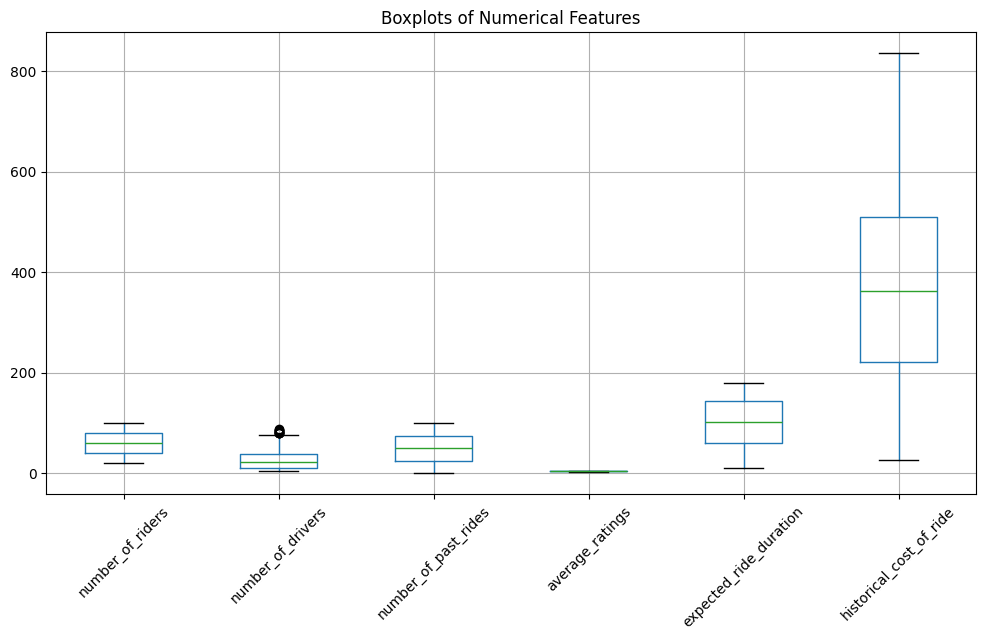

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of numerical features
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()


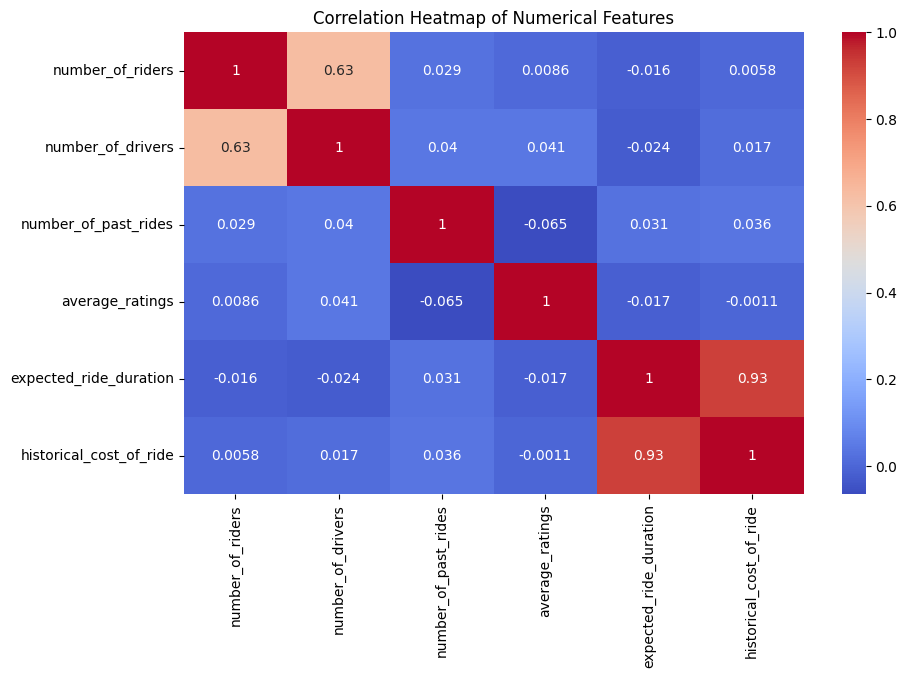

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [11]:
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True))



location_category value counts:
location_category
Urban       0.346
Rural       0.332
Suburban    0.322
Name: proportion, dtype: float64

customer_loyalty_status value counts:
customer_loyalty_status
Silver     0.367
Regular    0.320
Gold       0.313
Name: proportion, dtype: float64

time_of_booking value counts:
time_of_booking
Night        0.276
Afternoon    0.247
Morning      0.246
Evening      0.231
Name: proportion, dtype: float64

vehicle_type value counts:
vehicle_type
Premium    0.522
Economy    0.478
Name: proportion, dtype: float64


In [12]:
from scipy.stats import skew

for col in num_cols:
    print(f"{col} skewness: {skew(df[col])}")


number_of_riders skewness: 0.0021632616645425417
number_of_drivers skewness: 0.9617588924264777
number_of_past_rides skewness: -0.008444267438104912
average_ratings skewness: -0.07863604521780783
expected_ride_duration skewness: -0.13965805969802533
historical_cost_of_ride skewness: 0.20926523813030767


In [13]:
# =============================
# KPI Calculations for Dynamic Pricing Dataset
# =============================

# Map dataset columns to our KPI terms
df['Price'] = df['historical_cost_of_ride']
df['CompletedRides'] = df['number_of_riders']

# Assume cost per ride = 70% of price (example, since cost column not available)
# You can adjust this value if you have actual operating cost data
df['Cost_per_ride'] = df['Price'] * 0.7

# ---------- KPI 1: Revenue ----------
df['Revenue'] = df['Price'] * df['CompletedRides']

# ---------- KPI 2: Profit ----------
df['Profit'] = (df['Price'] - df['Cost_per_ride']) * df['CompletedRides']

# ---------- KPI 3: Revenue Lift (%) ----------
# Baseline Revenue = mean revenue across dataset
baseline_revenue = df['Revenue'].mean()
df['Revenue_Lift_%'] = ((df['Revenue'] - baseline_revenue) / baseline_revenue) * 100

# ---------- KPI 4: Gross Margin (%) ----------
df['Gross_Margin_%'] = (df['Profit'] / df['Revenue']) * 100

# ---------- KPI 5: Conversion Rate (%) ----------
# Since dataset doesn’t have booking intents, assume "Number_of_Riders" = completed rides
# For now, set booking intents = riders + 10% (example assumption)
df['BookingIntents'] = df['CompletedRides'] * 1.1
df['Conversion_Rate_%'] = (df['CompletedRides'] / df['BookingIntents']) * 100

# ---------- KPI 6: Price Change Rate (%) ----------
# Price volatility: percent difference from mean price
mean_price = df['Price'].mean()
df['Price_Change_%'] = (abs(df['Price'] - mean_price) / mean_price) * 100

# ---------- KPI 7: Cancellation Rate (%) ----------
# If no "CancelledRides" column exists, assume cancellation = 5% of riders (example assumption)
df['CancelledRides'] = df['CompletedRides'] * 0.05
df['Cancellation_Rate_%'] = (df['CancelledRides'] / (df['CompletedRides'] + df['CancelledRides'])) * 100

# =============================
# Final KPI Summary
# =============================
kpi_summary = {
    "Total Revenue (₹)": df['Revenue'].sum(),
    "Total Profit (₹)": df['Profit'].sum(),
    "Avg Revenue Lift (%)": df['Revenue_Lift_%'].mean(),
    "Avg Gross Margin (%)": df['Gross_Margin_%'].mean(),
    "Avg Conversion Rate (%)": df['Conversion_Rate_%'].mean(),
    "Avg Price Change Rate (%)": df['Price_Change_%'].mean(),
    "Avg Cancellation Rate (%)": df['Cancellation_Rate_%'].mean()
}

# Show KPI summary
print("\n=== KPI Summary ===")
for k, v in kpi_summary.items():
    print(f"{k}: {v:.2f}")

# Preview dataframe with KPIs
df.head()


=== KPI Summary ===
Total Revenue (₹): 22514545.02
Total Profit (₹): 6754363.51
Avg Revenue Lift (%): 0.00
Avg Gross Margin (%): 30.00
Avg Conversion Rate (%): 90.91
Avg Price Change Rate (%): 42.13
Avg Cancellation Rate (%): 4.76


,number_of_riders,number_of_drivers,location_category,customer_loyalty_status,number_of_past_rides,average_ratings,time_of_booking,vehicle_type,expected_ride_duration,historical_cost_of_ride,...,Cost_per_ride,Revenue,Profit,Revenue_Lift_%,Gross_Margin_%,BookingIntents,Conversion_Rate_%,Price_Change_%,CancelledRides,Cancellation_Rate_%
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,198.980091,25583.154572,7674.946372,13.629454,30.0,99.0,90.909091,23.689860,4.50,4.761905
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,121.712327,10084.735659,3025.420698,-55.207908,30.0,63.8,90.909091,53.322543,2.90,4.761905
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,230.856828,13851.409696,4155.422909,-38.477950,30.0,46.2,90.909091,11.464927,2.10,4.761905
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,329.140862,41847.909626,12554.372888,85.870554,30.0,97.9,90.909091,26.227630,4.45,4.761905
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,405.776996,45215.150944,13564.545283,100.826403,30.0,85.8,90.909091,55.618078,3.90,4.761905


In [14]:
# Feature Engineering for Dynamic Pricing Project

import numpy as np
import pandas as pd

# Load dataset
file_path = "/content/dynamic_pricing.csv"
df = pd.read_csv(file_path)

# ==============================
# 1. Competitor Price Index
# Formula: (Historical_Cost_of_Ride / mean(Historical_Cost_of_Ride))
# ==============================
df["Competitor_Price_Index"] = df["Historical_Cost_of_Ride"] / df["Historical_Cost_of_Ride"].mean()

# ==============================
# 2. Cost per Minute
# Formula: Historical_Cost_of_Ride / Expected_Ride_Duration
# ==============================
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / df["Expected_Ride_Duration"]

# ==============================
# 3. Driver to Rider Ratio
# Formula: Number_of_Drivers / Number_of_Riders
# ==============================
df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)

# ==============================
# 4. Rider to Driver Ratio
# Formula: Number_of_Riders / Number_of_Drivers
# ==============================
df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-5)

# ==============================
# 5. Supply Tightness
# Formula: (Number_of_Riders - Number_of_Drivers) / Number_of_Riders
# ==============================
df["Supply_Tightness"] = (df["Number_of_Riders"] - df["Number_of_Drivers"]) / (df["Number_of_Riders"] + 1e-5)

# ==============================
# 6. Inventory Health Index
# Formula: Number_of_Past_Rides * Average_Ratings
# ==============================
df["Inventory_Health_Index"] = df["Number_of_Past_Rides"] * df["Average_Ratings"]

# ==============================
# 7. Loyalty Score
# Encode Customer_Loyalty_Status
# Regular=1, Silver=2, Gold=3, Platinum=4
# ==============================
loyalty_map = {"Regular": 1, "Silver": 2, "Gold": 3, "Platinum": 4}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map)

# ==============================
# 8. Peak Indicator
# 1 if booking time is Morning/Evening, else 0
# ==============================
df["Peak"] = df["Time_of_Booking"].apply(lambda x: 1 if x in ["Morning", "Evening"] else 0)

# ==============================
# 9. Vehicle Factor
# Economy=1, Premium=1.5, Luxury=2
# ==============================
vehicle_map = {"Economy": 1.0, "Premium": 1.5, "Luxury": 2.0}
df["Vehicle_Factor"] = df["Vehicle_Type"].map(vehicle_map)

# ==============================
# 10. Baseline Price
# Formula: Cost_per_Min * Expected_Ride_Duration * Vehicle_Factor
# ==============================
df["baseline_price"] = df["Cost_per_Min"] * df["Expected_Ride_Duration"] * df["Vehicle_Factor"]

# ==============================
# 11. Competitor Price
# Formula: baseline_price * Competitor_Price_Index
# ==============================
df["competitor_price"] = df["baseline_price"] * df["Competitor_Price_Index"]

# ==============================
# 12. Probability of Completion
# Formula: sigmoid(Average_Ratings - 3.5)
# ==============================
df["p_complete"] = 1 / (1 + np.exp(-(df["Average_Ratings"] - 3.5)))

# ==============================
# 13. Final Dynamic Price
# Formula: baseline_price * (1 + Supply_Tightness + (1 - p_complete))
# ==============================
df["price"] = df["baseline_price"] * (1 + df["Supply_Tightness"] + (1 - df["p_complete"]))

# Preview engineered dataset
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Rider_Driver_Ratio,Supply_Tightness,Inventory_Health_Index,Loyalty_Score,Peak,Vehicle_Factor,baseline_price,competitor_price,p_complete,price
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,2.000000,0.500000,58.11,2,0,1.5,426.385910,325.375684,0.725119,756.784014
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,1.487179,0.327586,292.32,2,1,1.0,173.874753,81.160313,0.636453,294.045438
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,1.354838,0.261905,0.00,2,0,1.5,494.693203,437.976988,0.620106,812.186444
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,3.178570,0.685393,288.77,1,0,1.5,705.301848,890.285804,0.692110,1405.866660
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,3.545453,0.717949,278.98,1,0,1.0,579.681422,902.089087,0.567093,1246.811104


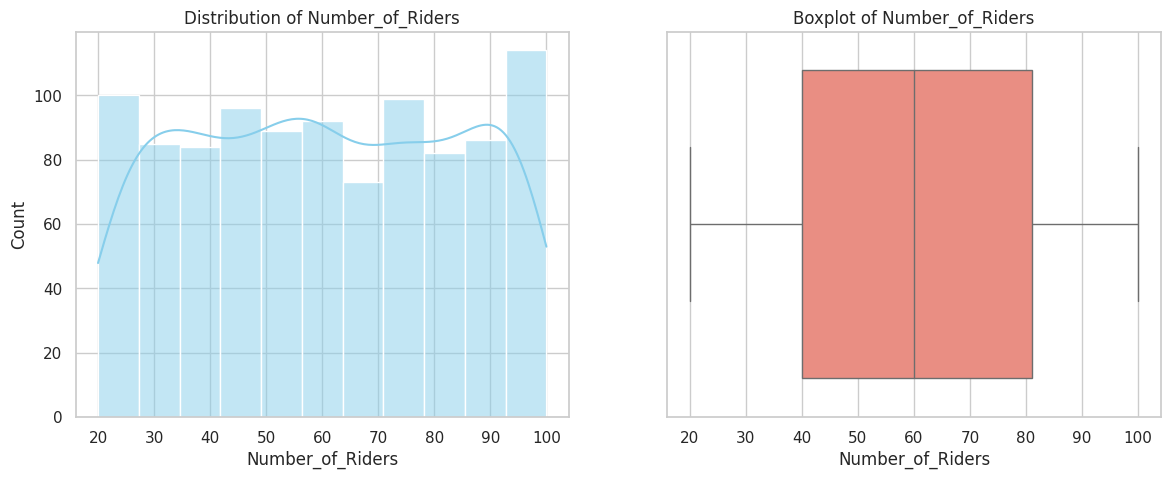

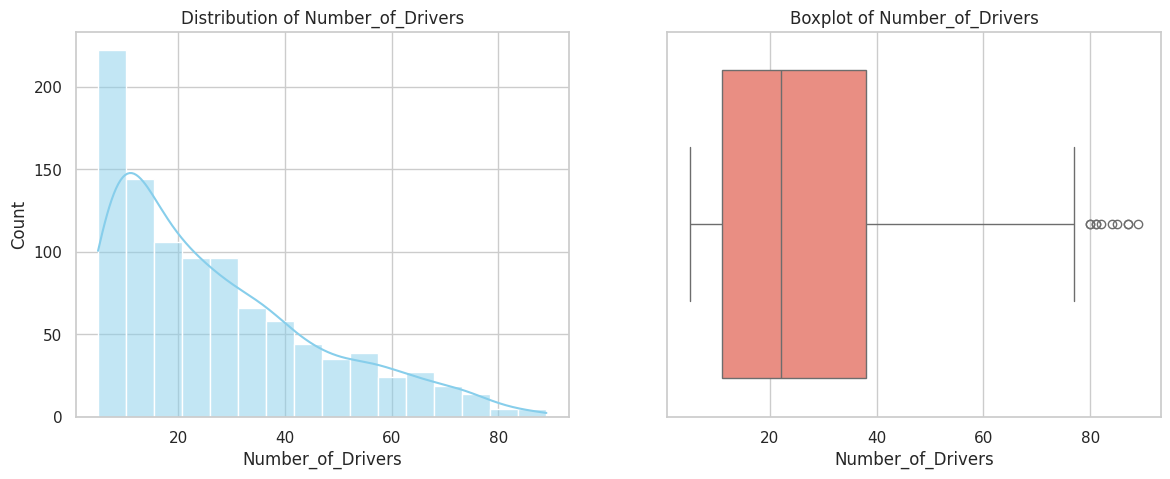

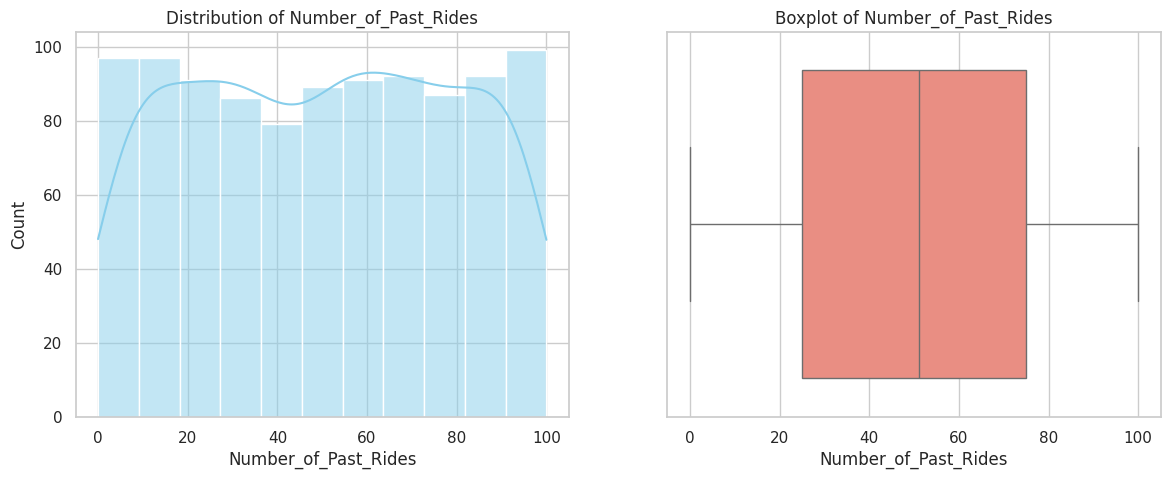

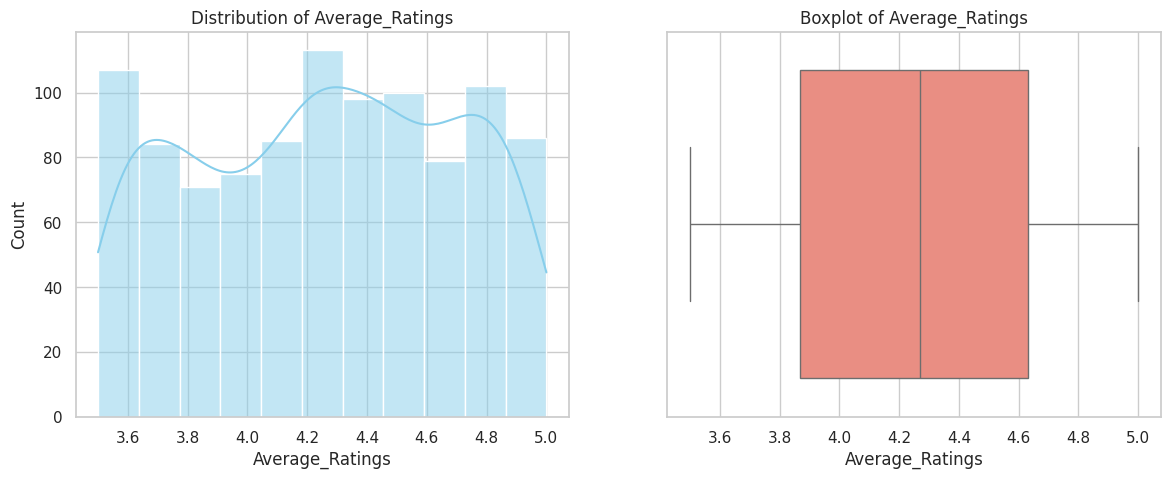

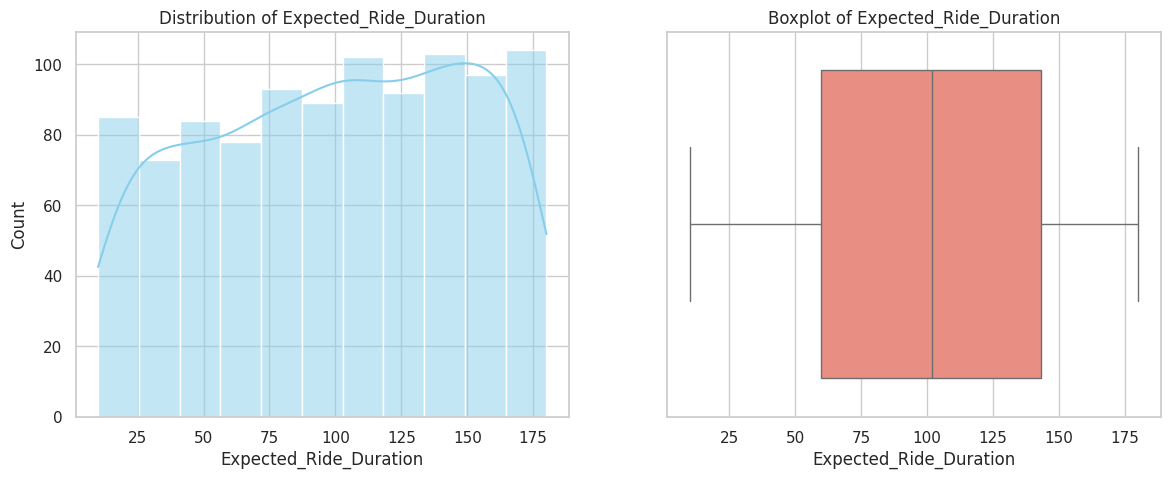

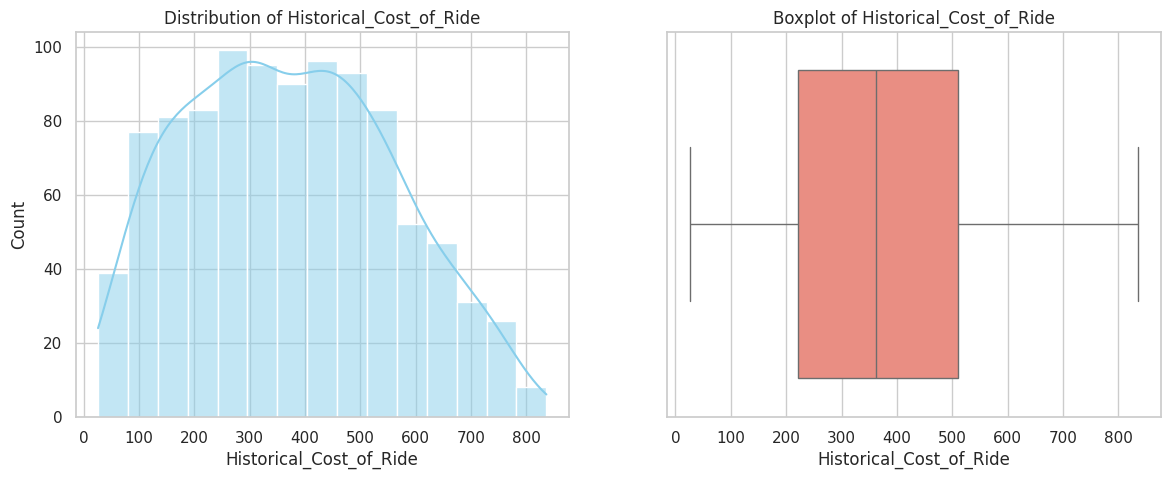

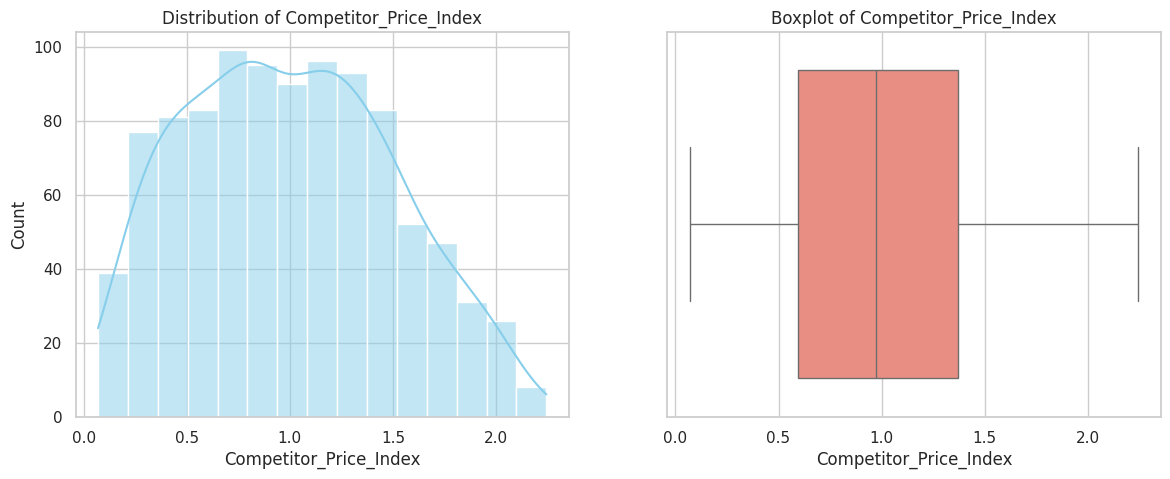

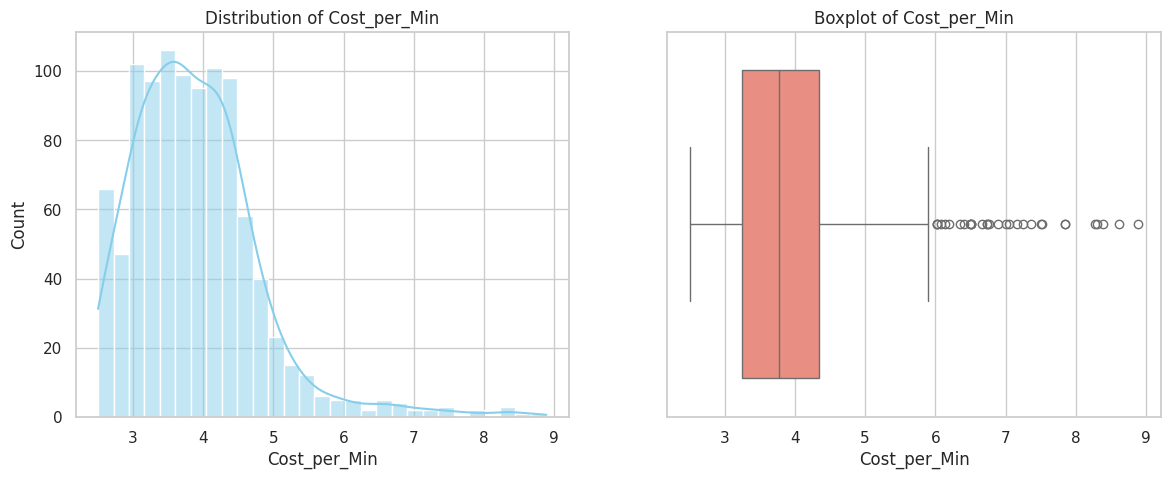

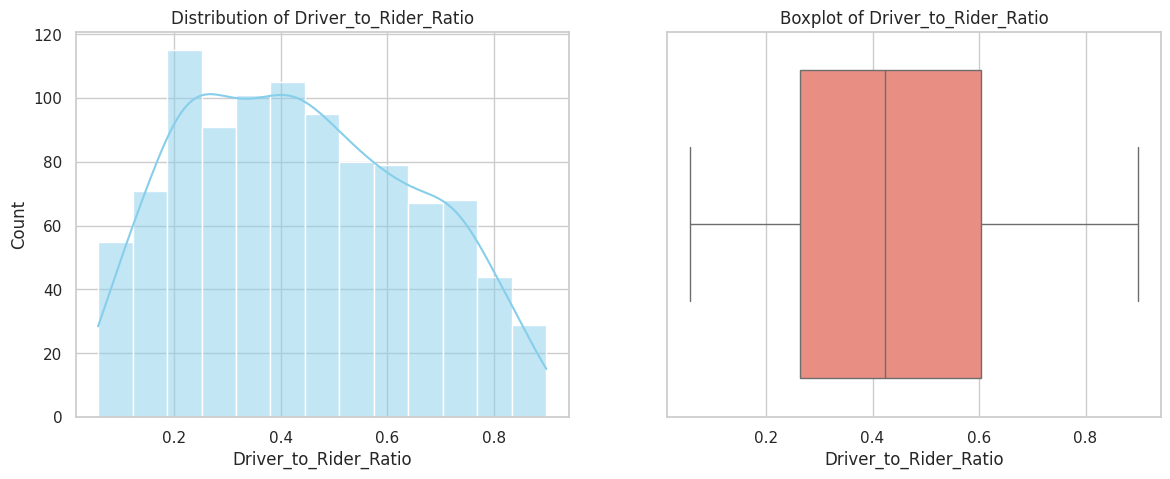

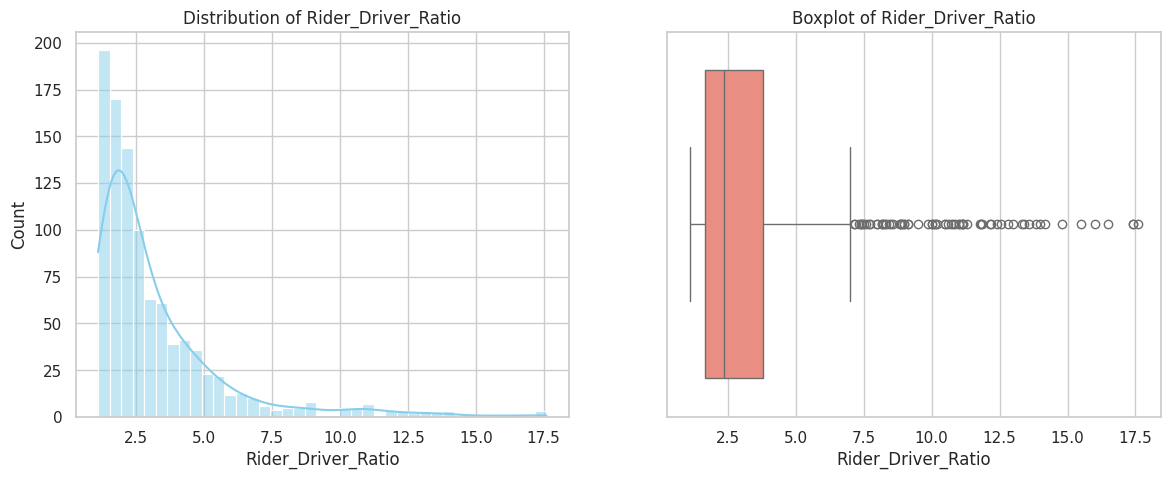

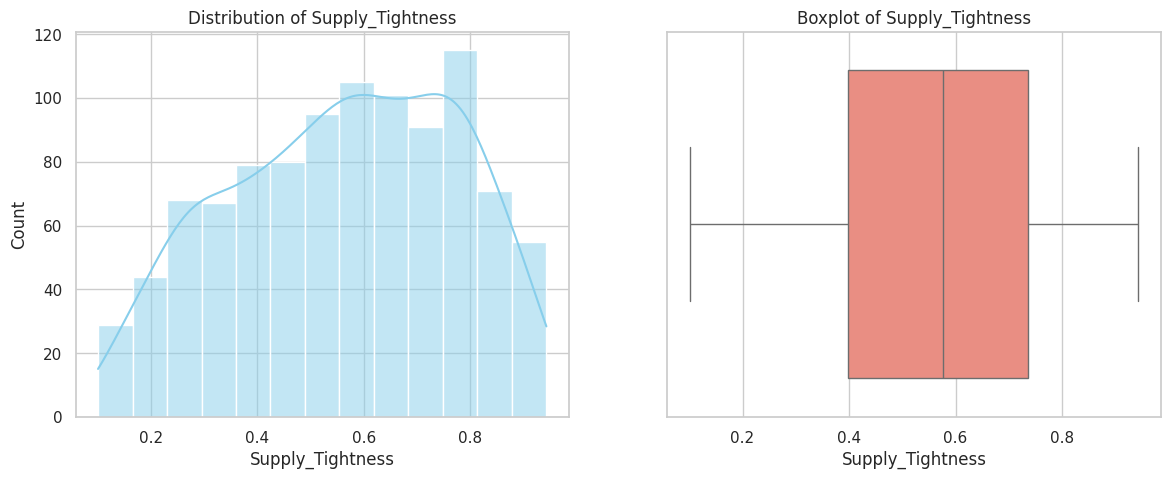

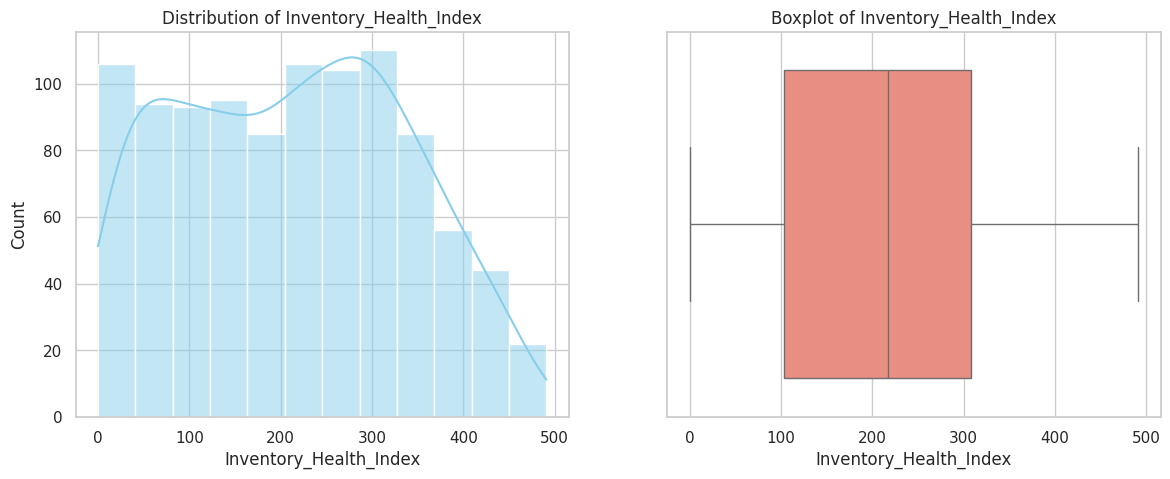

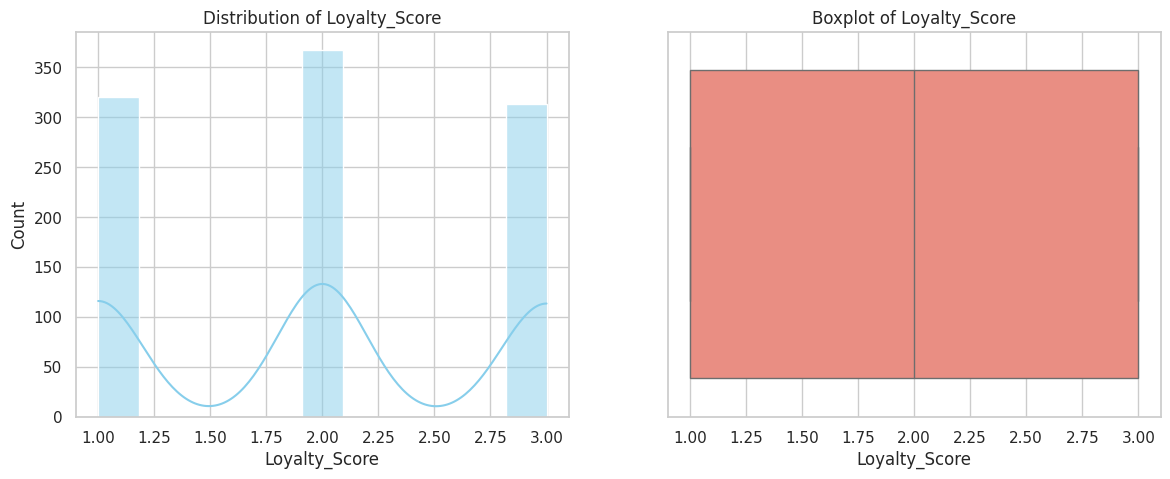

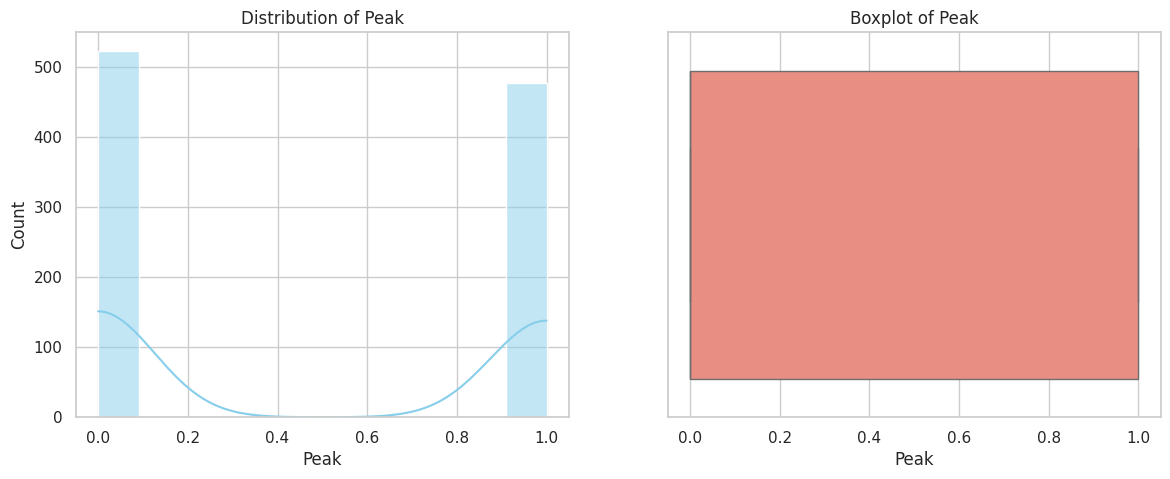

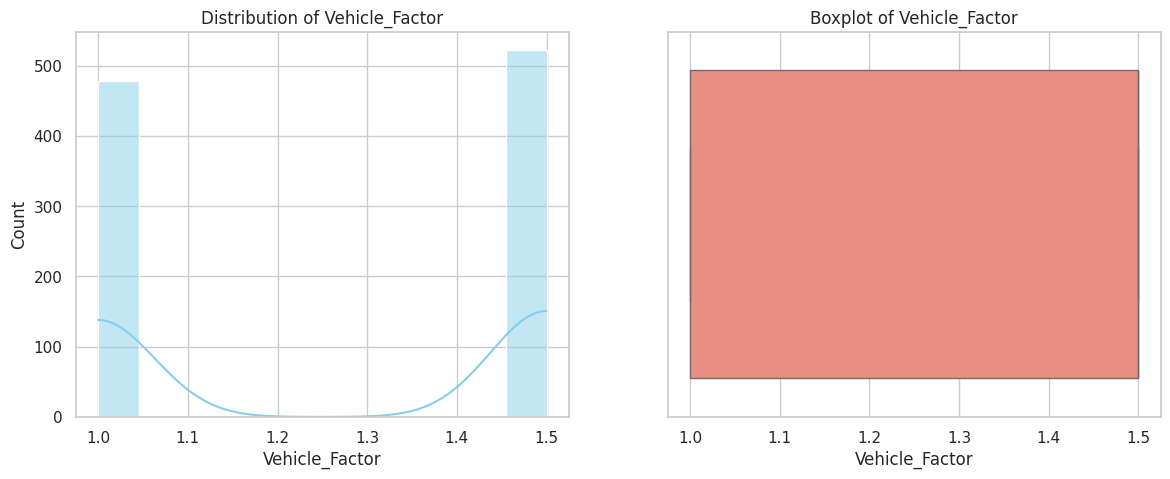

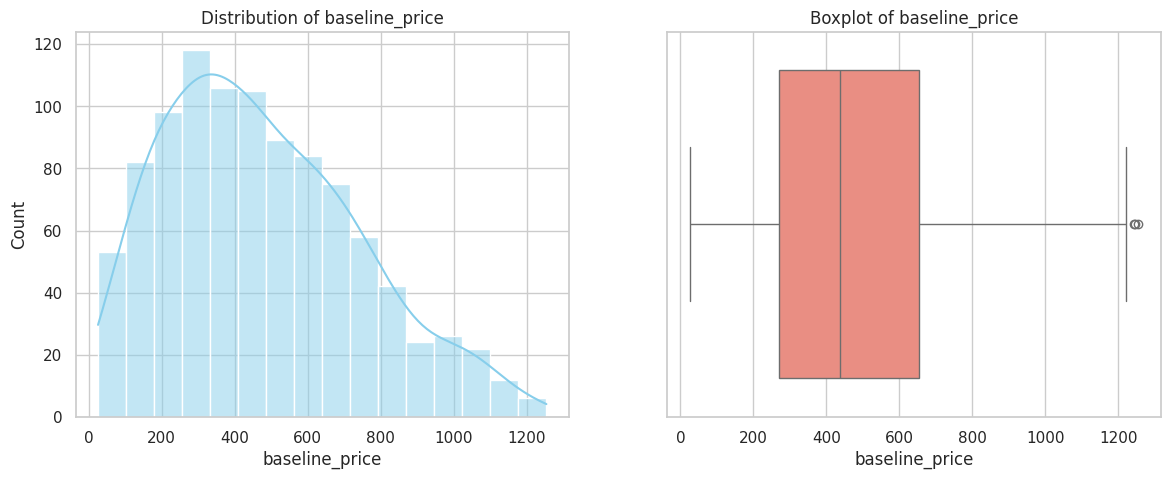

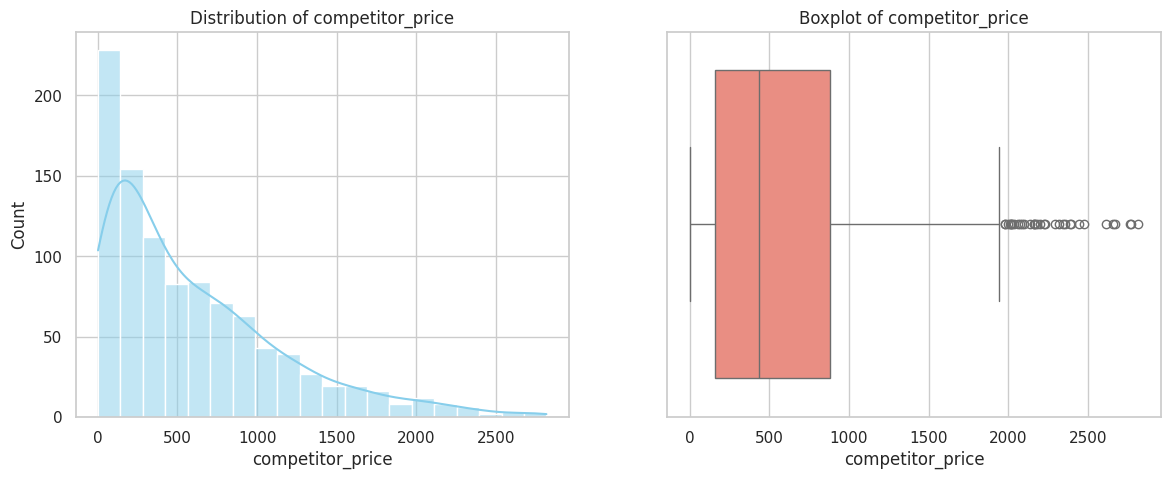

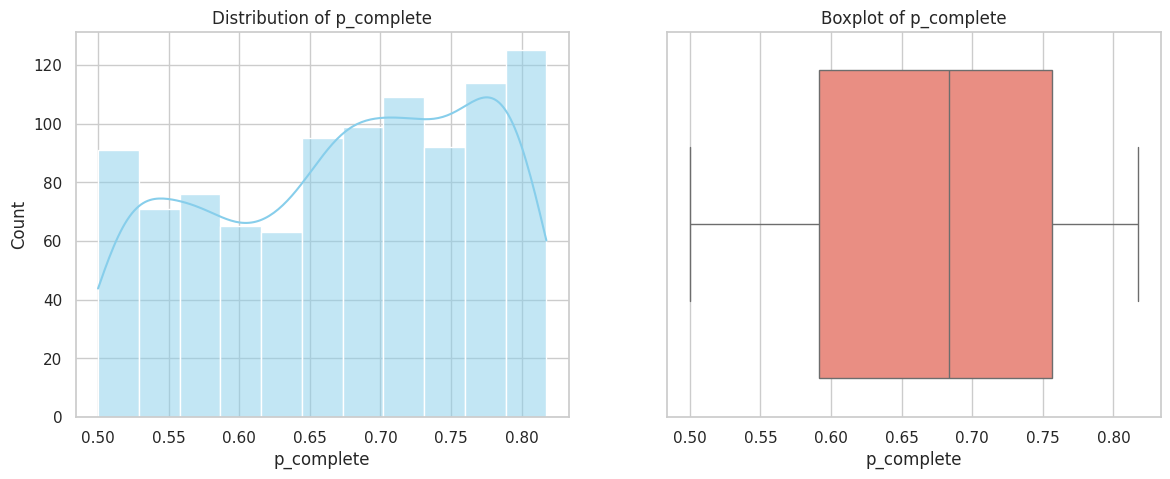

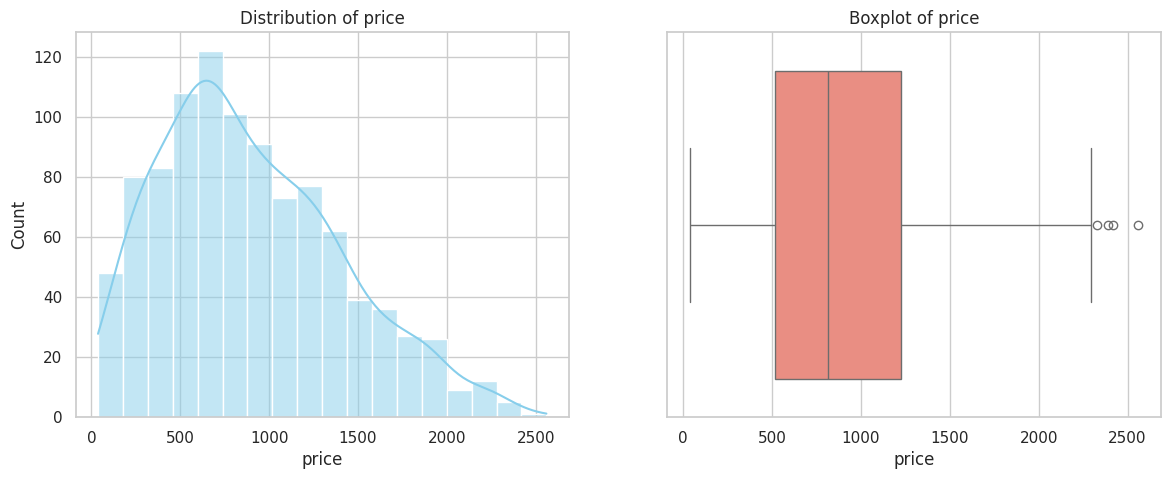

/tmp/ipython-input-3338316812.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


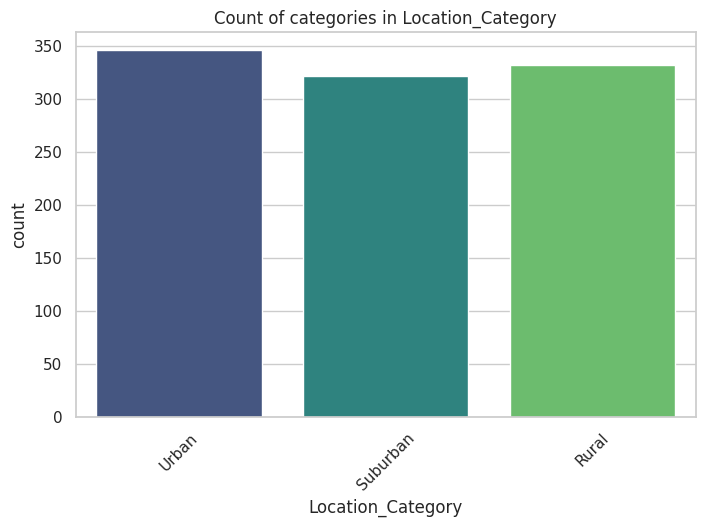

/tmp/ipython-input-3338316812.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


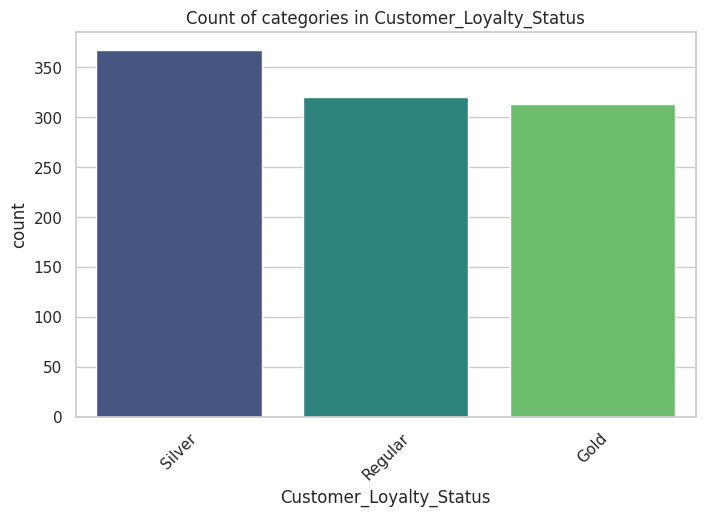

/tmp/ipython-input-3338316812.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


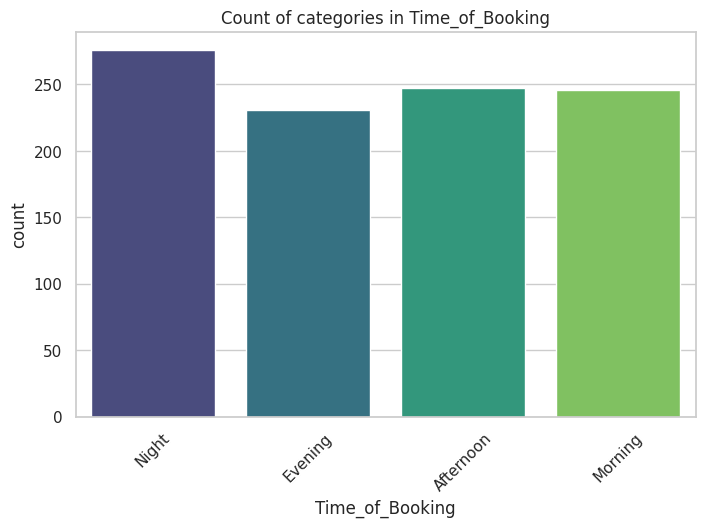

/tmp/ipython-input-3338316812.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


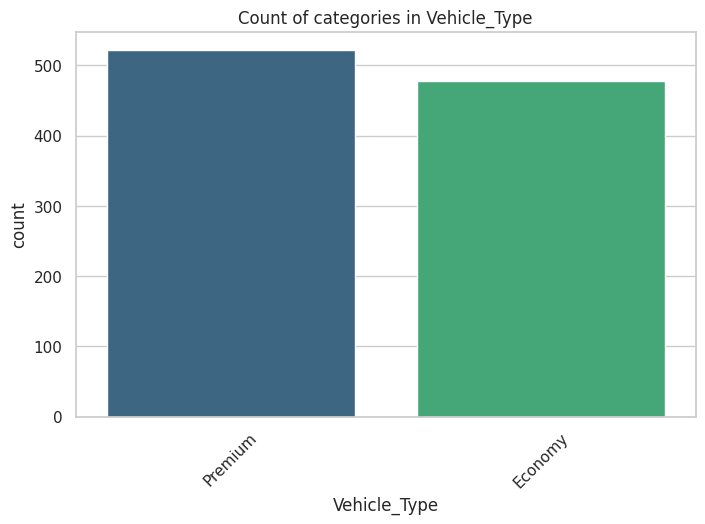

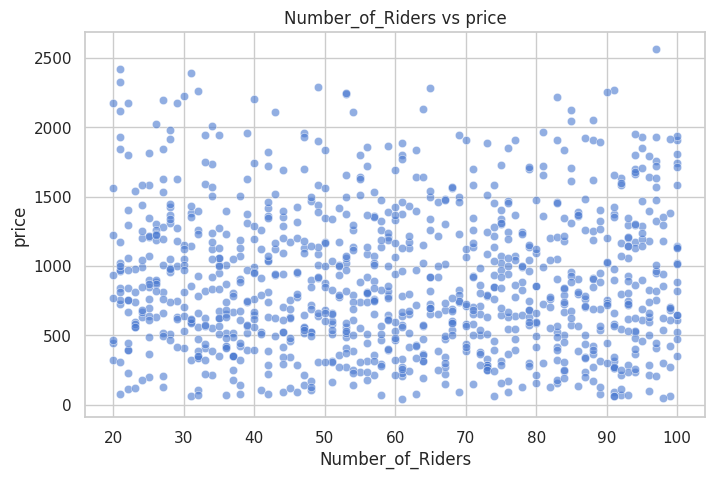

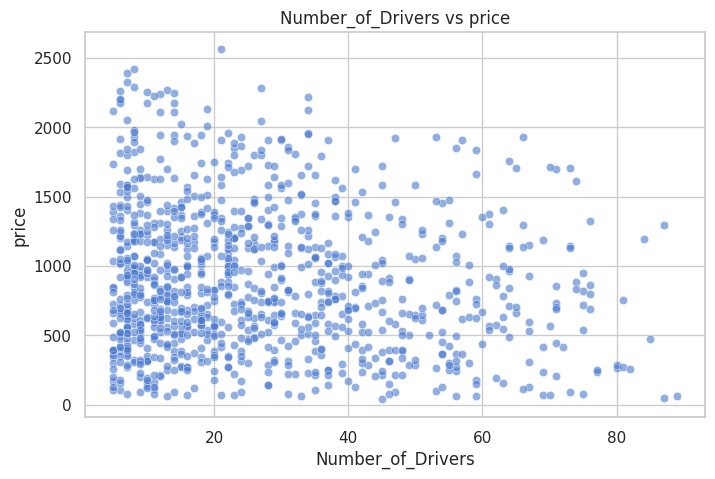

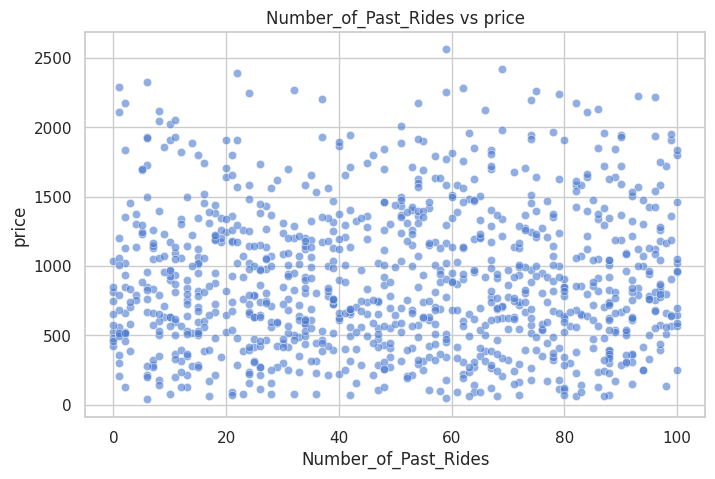

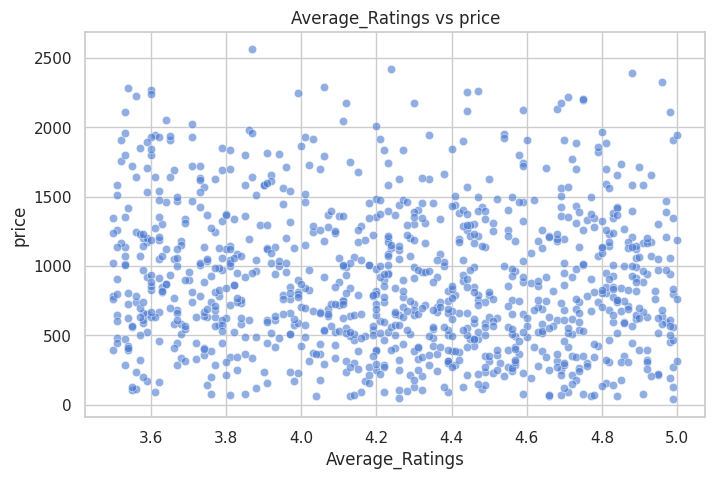

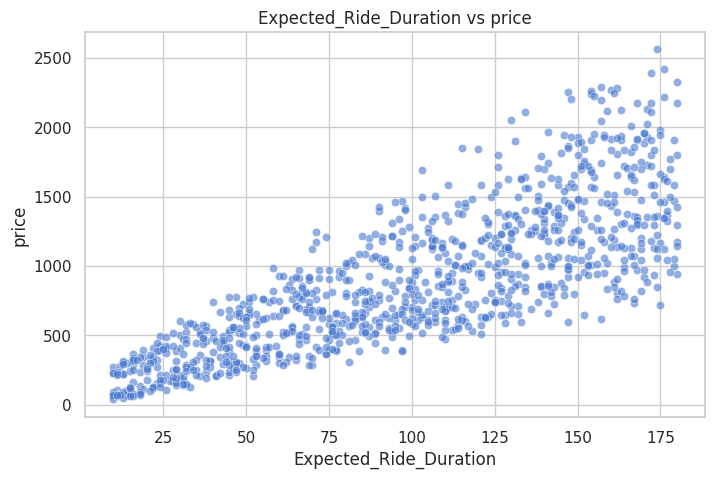

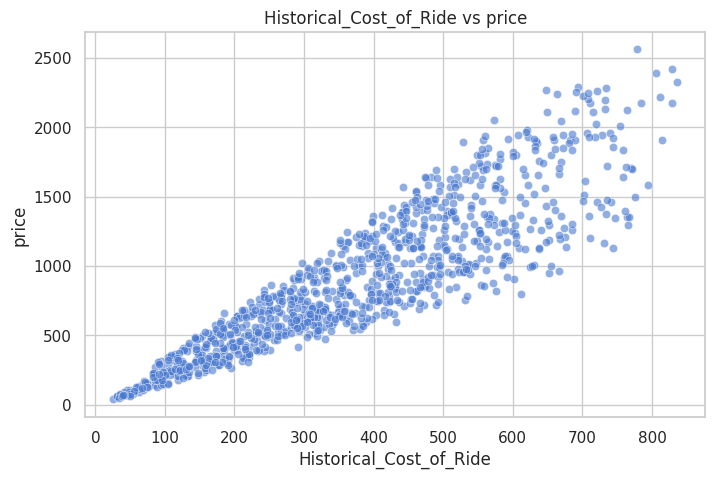

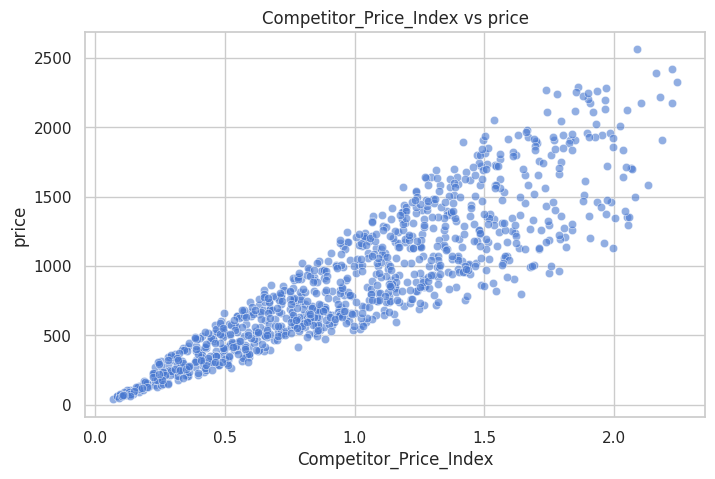

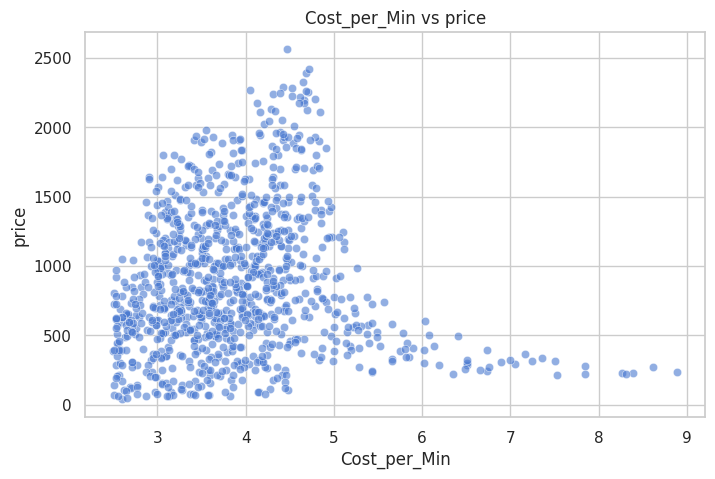

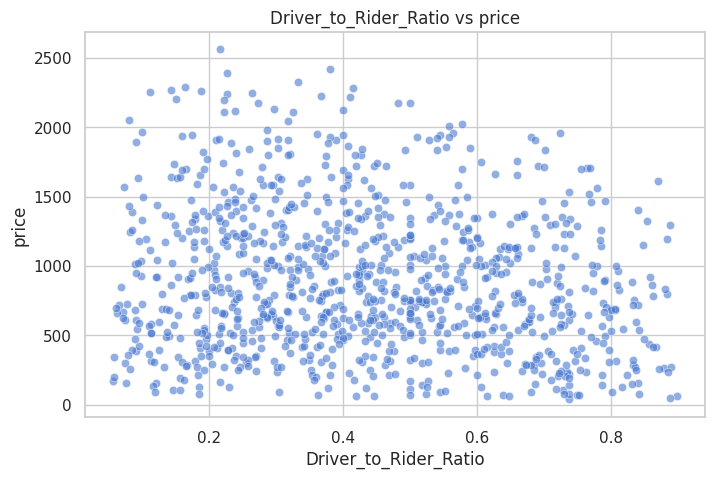

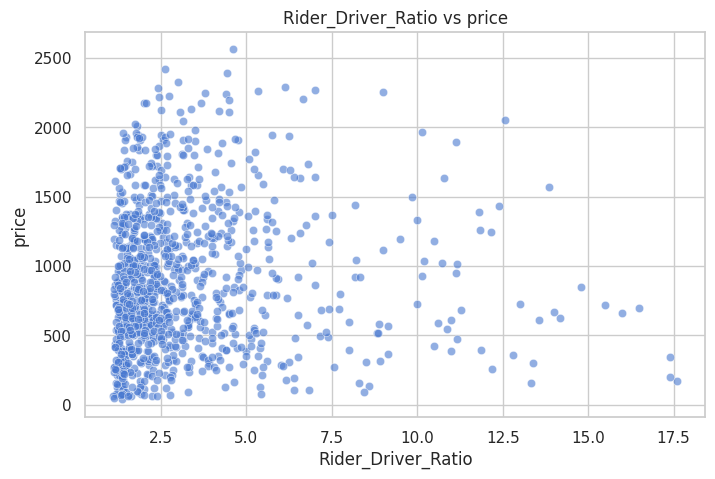

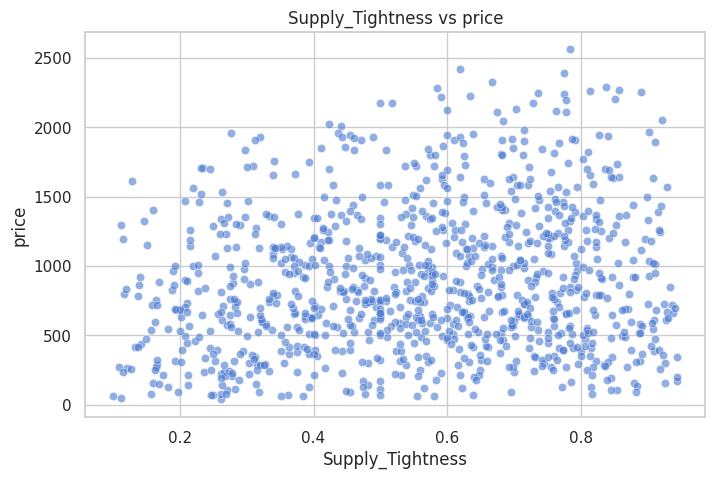

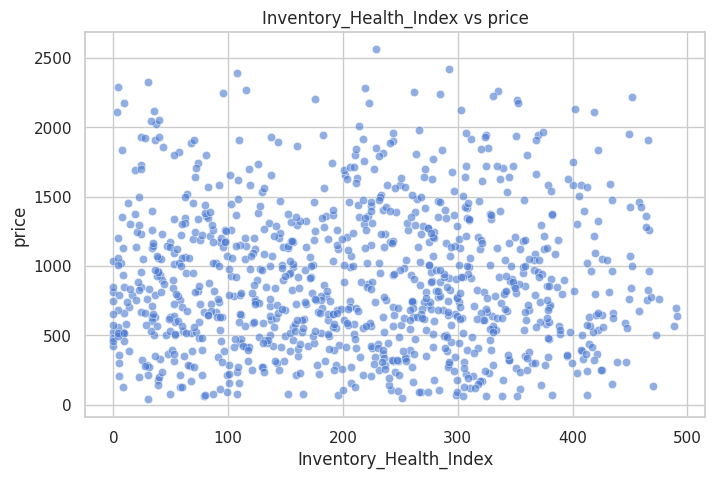

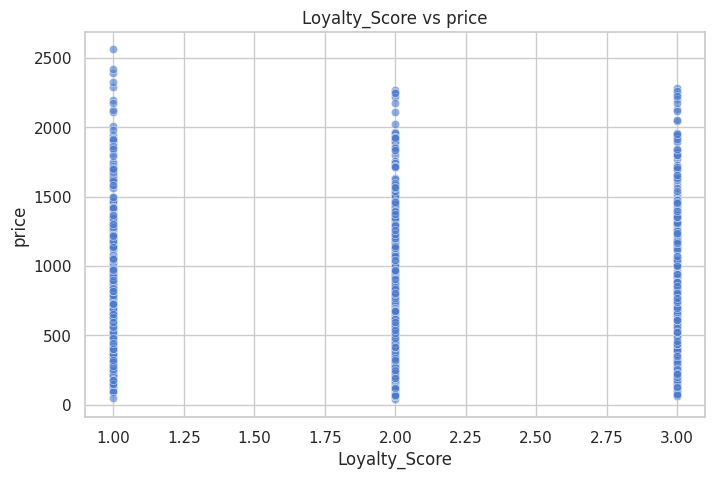

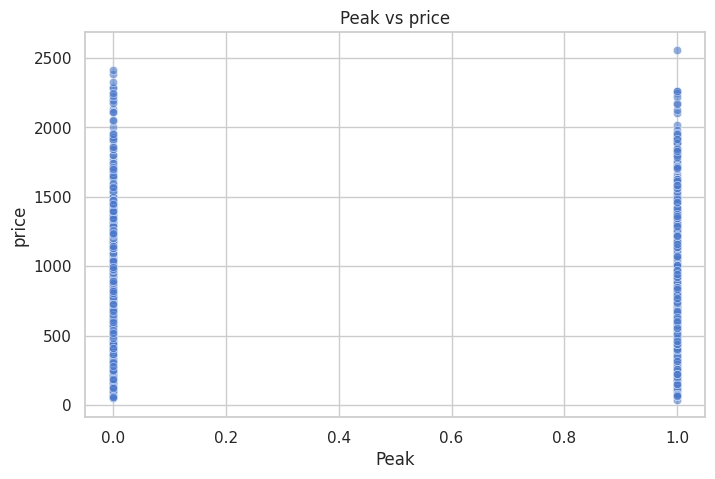

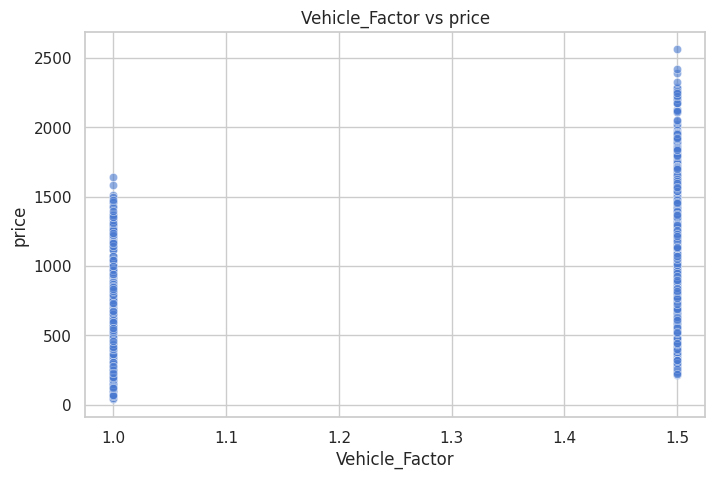

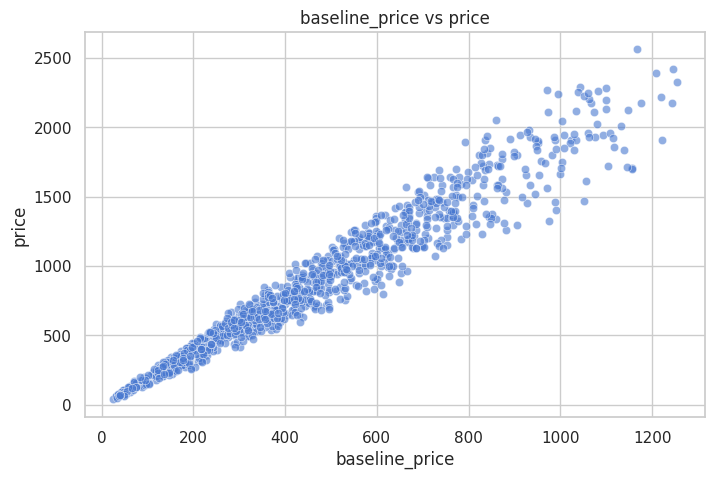

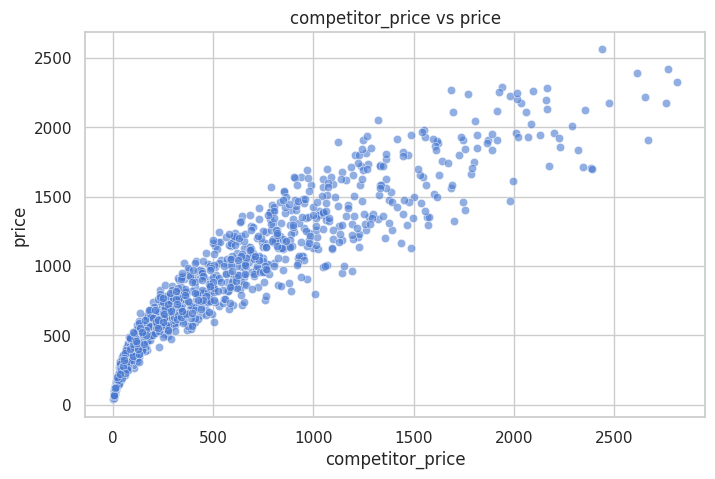

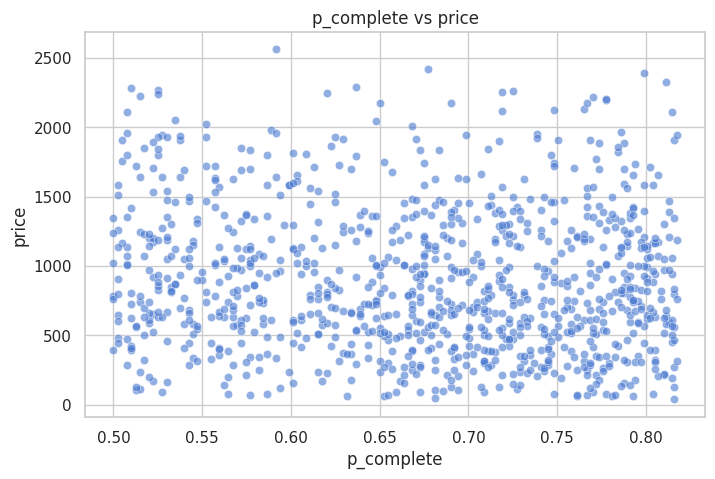

/tmp/ipython-input-3338316812.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], palette="Set2")


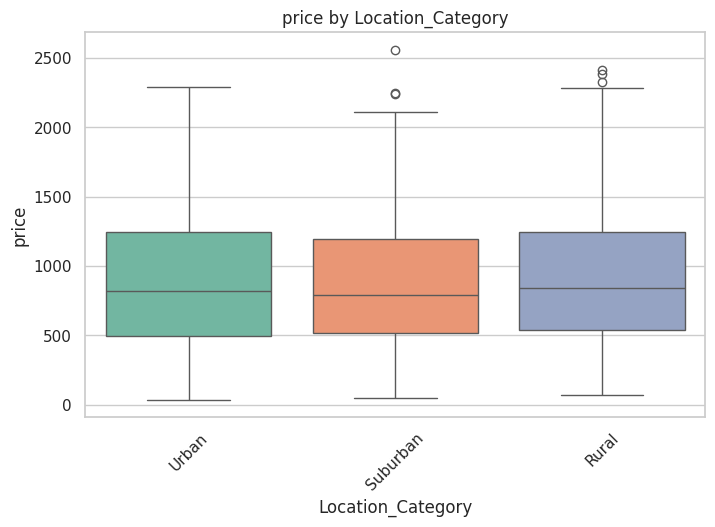

/tmp/ipython-input-3338316812.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], palette="Set2")


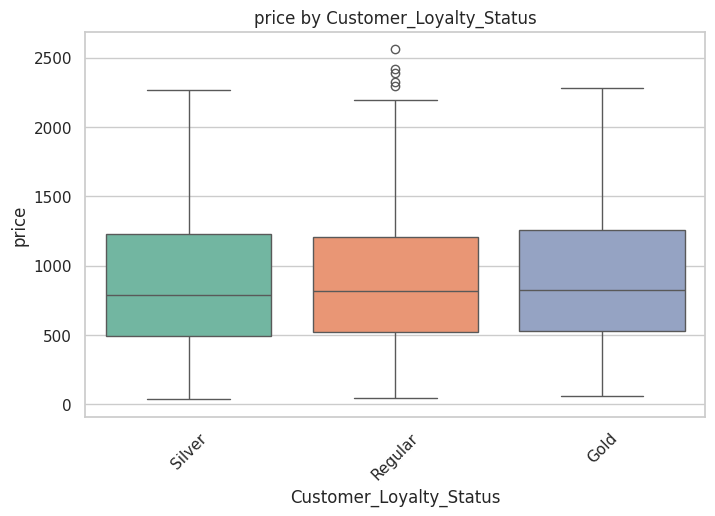

/tmp/ipython-input-3338316812.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], palette="Set2")


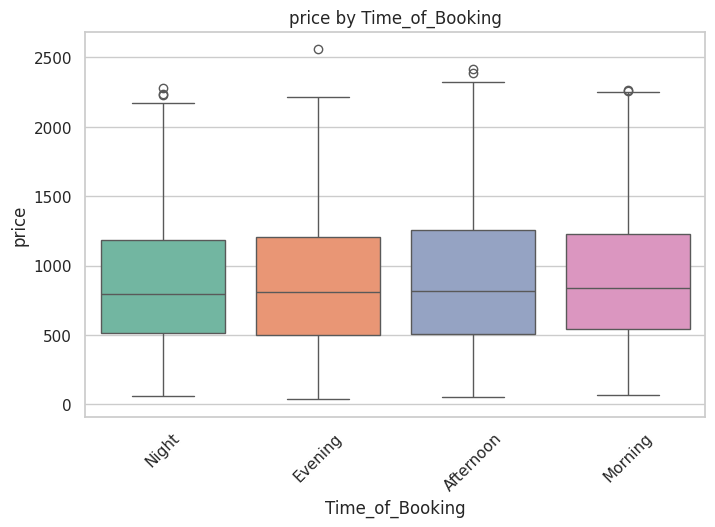

/tmp/ipython-input-3338316812.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], palette="Set2")


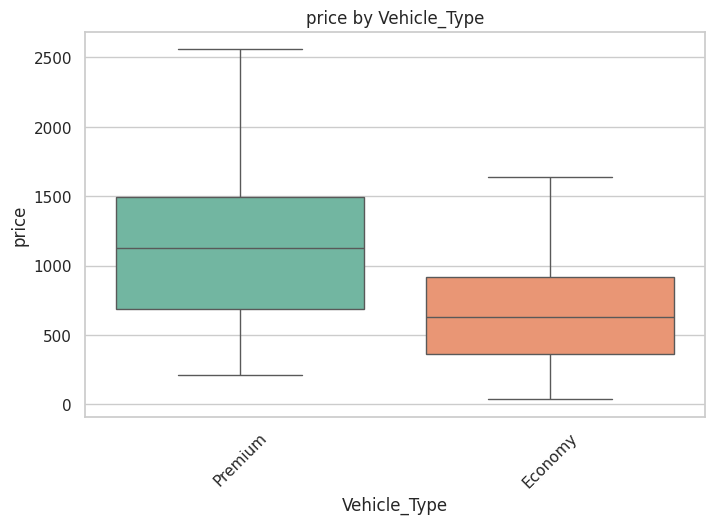

/tmp/ipython-input-3338316812.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-3338316812.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")


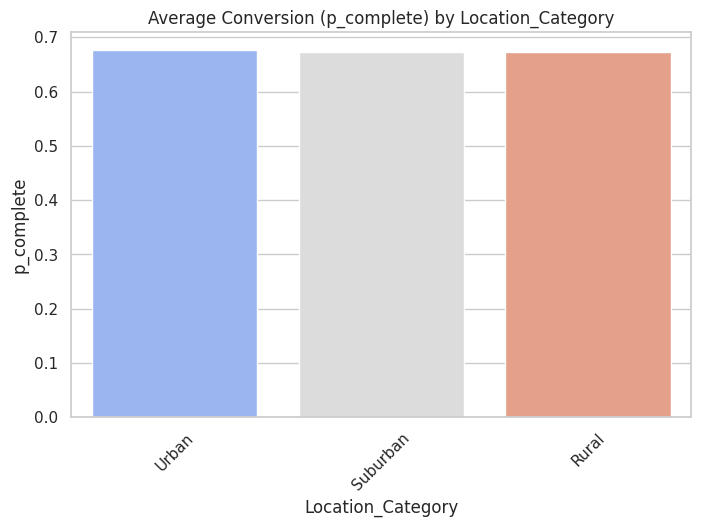

/tmp/ipython-input-3338316812.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-3338316812.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")


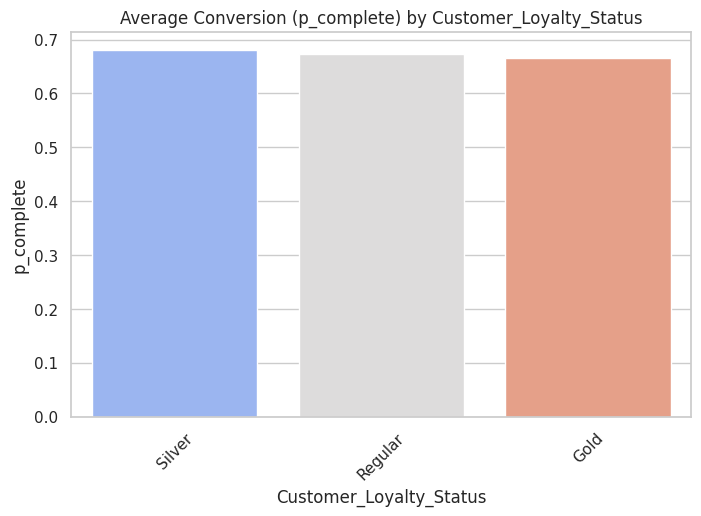

/tmp/ipython-input-3338316812.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-3338316812.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")


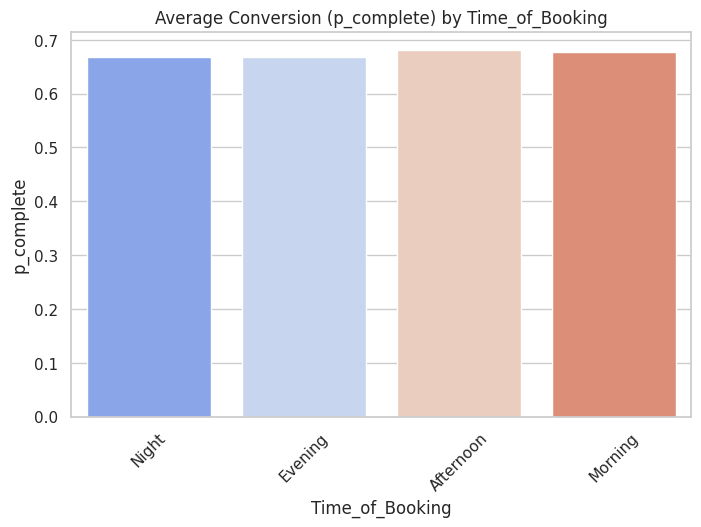

/tmp/ipython-input-3338316812.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-3338316812.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")


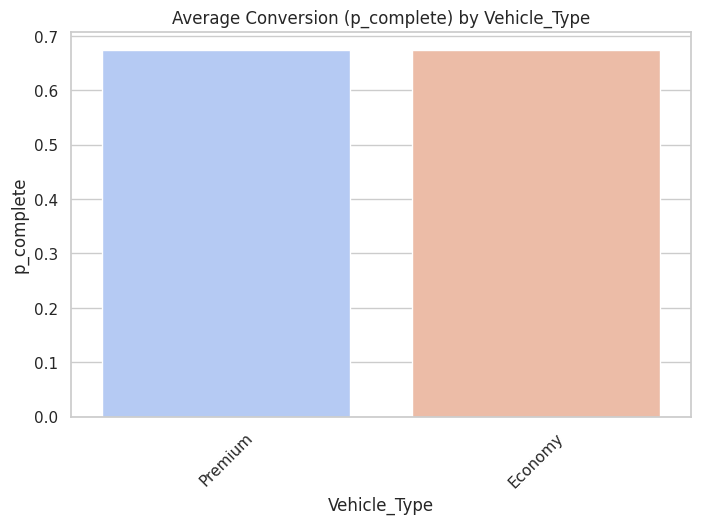

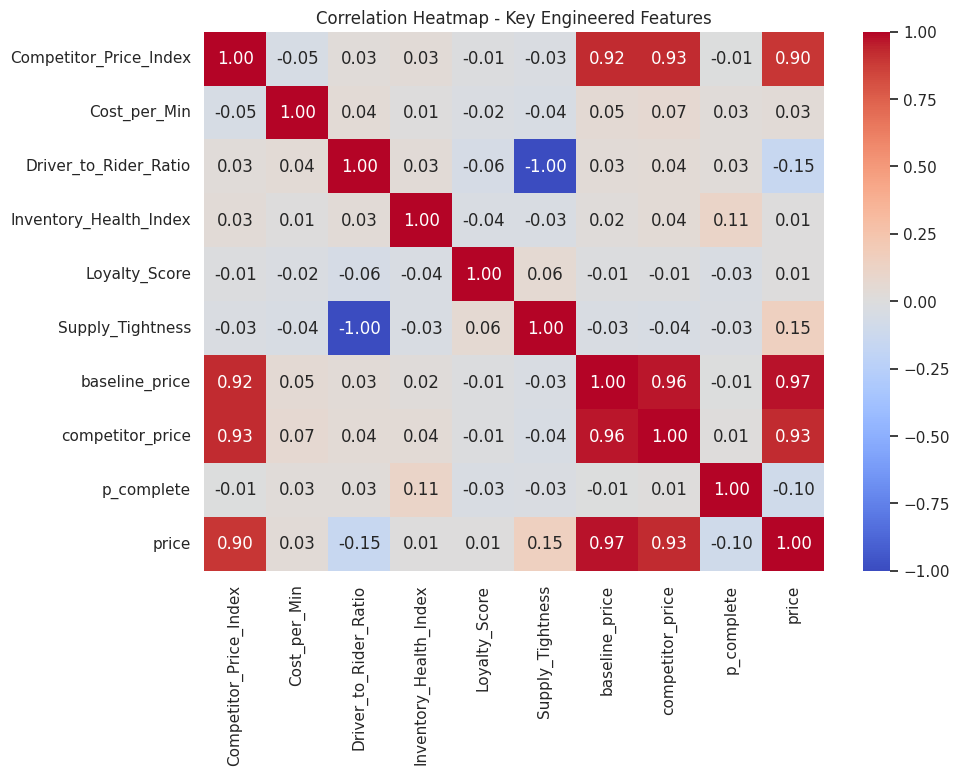

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,6)

# ------------------------------
# 1. Numeric distributions + Boxplots
# ------------------------------
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="salmon")
    axes[1].set_title(f"Boxplot of {col}")

    plt.show()

# ------------------------------
# 2. Categorical counts
# ------------------------------
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Count of categories in {col}")
    plt.xticks(rotation=45)
    plt.show()

# ------------------------------
# 3. Relationship plots (price vs features)
# ------------------------------
# If you have engineered "price", else use Historical_Cost_of_Ride
target_col = "price" if "price" in df.columns else "Historical_Cost_of_Ride"

for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(8,5))
        sns.scatterplot(x=df[col], y=df[target_col], alpha=0.6)
        plt.title(f"{col} vs {target_col}")
        plt.show()

for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df[target_col], palette="Set2")
    plt.title(f"{target_col} by {col}")
    plt.xticks(rotation=45)
    plt.show()

# ------------------------------
# 4. Conversion by Segments (using p_complete proxy)
# ------------------------------
if "p_complete" in df.columns:
    for col in cat_cols:
        plt.figure(figsize=(8,5))
        sns.barplot(x=df[col], y=df["p_complete"], estimator="mean", ci=None, palette="coolwarm")
        plt.title(f"Average Conversion (p_complete) by {col}")
        plt.xticks(rotation=45)
        plt.show()

# ------------------------------
# 5. Correlation heatmap (key engineered features)
# ------------------------------
# Select only numeric engineered features if available
key_features = ['Competitor_Price_Index','Cost_per_Min','Driver_to_Rider_Ratio',
                'Inventory_Health_Index','Loyalty_Score','Supply_Tightness',
                'baseline_price','competitor_price','p_complete','price']

# Filter columns that exist in df
heatmap_cols = [col for col in key_features if col in df.columns]

plt.figure(figsize=(10,7))
sns.heatmap(df[heatmap_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Key Engineered Features")
plt.show()


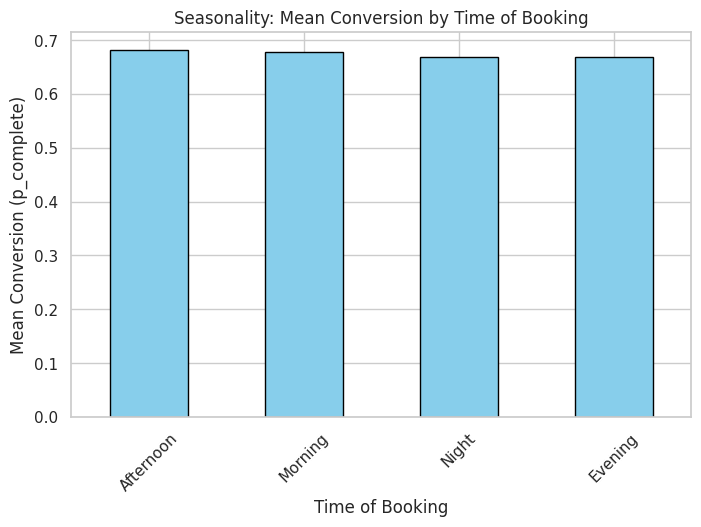

/tmp/ipython-input-1905123020.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_pressure.index, y=comp_pressure["avg_gap_pct"], palette="coolwarm")


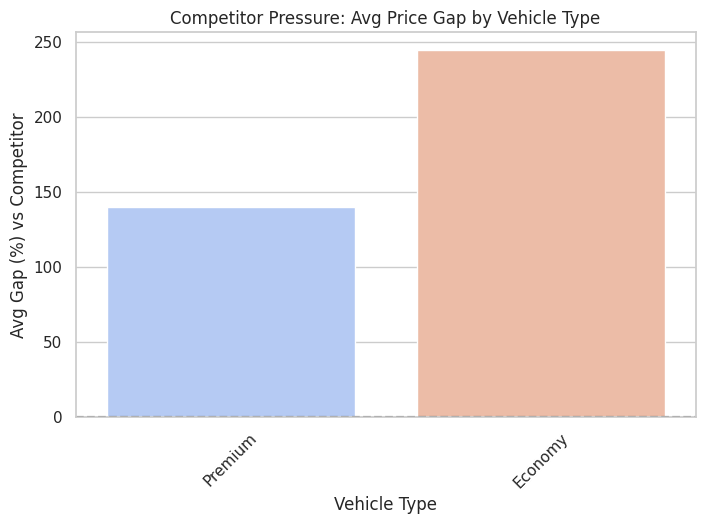

/tmp/ipython-input-1905123020.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df.groupby("Inventory_Band").agg(


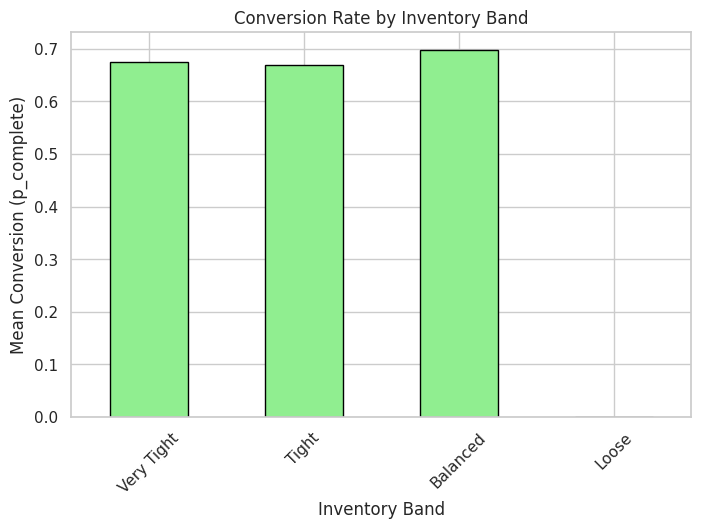

/tmp/ipython-input-1905123020.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seg_profile.index, y=seg_profile["mean_conv"], palette="viridis")


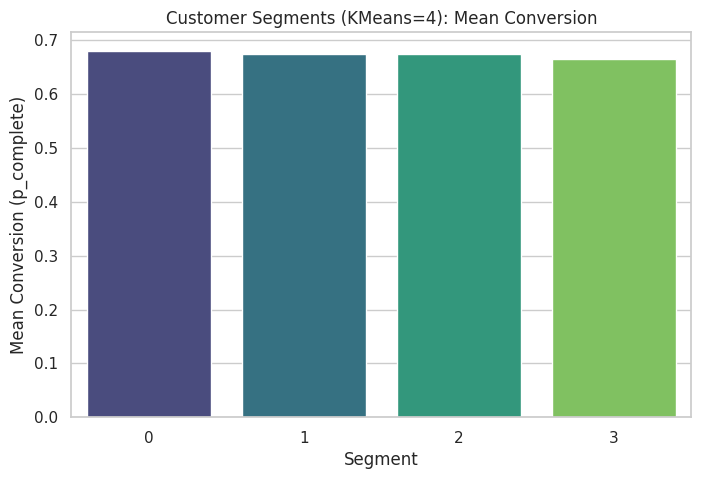

📌 Seasonality Summary:
                  mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.681127  905.037407          14708
Morning           0.677243  909.458791          14675
Night             0.668666  880.727042          17009
Evening           0.668001  893.971412          13980 

📌 Competitor Pressure Summary:
               avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Premium        139.704802       768.794695     1118.282613
Economy        244.347437       416.115785      655.053635 

📌 Inventory Health Summary:
                 mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.674098  954.981691    628
Tight            0.669670  825.769743    327
Balanced         0.697423  602.310082     45
Loose                 NaN         NaN      0 

📌 Segment Profiling:
             mean_conv   mean_price   mean_cost  mean_loya

In [16]:
# -------------------------------
# 📊 ADVANCED EDA VISUALIZATIONS
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -------------------------------
# 5.1 SEASONALITY ANALYSIS
# -------------------------------
seasonality = (
    df.groupby("Time_of_Booking")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            total_intents=("Number_of_Riders", "sum")
        )
        .sort_values("mean_conv", ascending=False)
)

# Plot conversion rates by time of booking
plt.figure(figsize=(8,5))
seasonality["mean_conv"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Seasonality: Mean Conversion by Time of Booking")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Time of Booking")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 5.2 COMPETITOR PRESSURE
# -------------------------------
df["Competitor_Gap_pct"] = (df["price"] - df["competitor_price"]) / df["competitor_price"] * 100.0

comp_pressure = (
    df.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct","mean"),
            mean_comp_price=("competitor_price","mean"),
            mean_our_price=("price","mean"),
        )
        .sort_values("avg_gap_pct")
)

# Plot competitor gap by vehicle type
plt.figure(figsize=(8,5))
sns.barplot(x=comp_pressure.index, y=comp_pressure["avg_gap_pct"], palette="coolwarm")
plt.axhline(0, color="black", linestyle="--")
plt.title("Competitor Pressure: Avg Price Gap by Vehicle Type")
plt.ylabel("Avg Gap (%) vs Competitor")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 5.3 INVENTORY HEALTH BANDS
# -------------------------------
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]

df["Inventory_Band"] = pd.cut(
    df["Driver_to_Rider_Ratio"],
    bins=bins, labels=labels, include_lowest=True
)

inv_summary = df.groupby("Inventory_Band").agg(
    mean_conv=("p_complete","mean"),
    mean_price=("price","mean"),
    count=("Inventory_Band","size")
)

# Plot conversion by inventory band
plt.figure(figsize=(8,5))
inv_summary["mean_conv"].plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Conversion Rate by Inventory Band")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Inventory Band")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 6. CUSTOMER SEGMENTATION (KMeans)
# -------------------------------
seg_features = [
    "Loyalty_Score","Rider_Driver_Ratio","Driver_to_Rider_Ratio",
    "Supply_Tightness","Cost_per_Min","Inventory_Health_Index",
    "Expected_Ride_Duration"
]

# Fill missing values
X = df[seg_features].copy().fillna(df[seg_features].median())

# Scale features
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["segment_k4"] = kmeans.fit_predict(Xs)

# Segment profiling
seg_profile = (
    df.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete","mean"),
            mean_price=("price","mean"),
            mean_cost=("Historical_Cost_of_Ride","mean"),
            mean_loyalty=("Loyalty_Score","mean"),
            mean_ratio=("Rider_Driver_Ratio","mean"),
            count=("segment_k4","size")
        )
        .sort_values("mean_conv", ascending=False)
)

# Plot segment profiling - conversion rates
plt.figure(figsize=(8,5))
sns.barplot(x=seg_profile.index, y=seg_profile["mean_conv"], palette="viridis")
plt.title("Customer Segments (KMeans=4): Mean Conversion")
plt.ylabel("Mean Conversion (p_complete)")
plt.xlabel("Segment")
plt.show()

# -------------------------------
# Print Summary Tables
# -------------------------------
print("📌 Seasonality Summary:\n", seasonality, "\n")
print("📌 Competitor Pressure Summary:\n", comp_pressure, "\n")
print("📌 Inventory Health Summary:\n", inv_summary, "\n")
print("📌 Segment Profiling:\n", seg_profile, "\n")


In [17]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/dynamic_pricing.csv").copy()

# -------------------------------------------------------
# 1. Define Static Pricing (baseline)
# -------------------------------------------------------
# Use Historical_Cost_of_Ride as the static price
df["static_price"] = df["Historical_Cost_of_Ride"]

# Assume completion probability (p_complete) based on loyalty & rating
def estimate_completion(row):
    base = 0.5
    # Add loyalty effects
    if row["Customer_Loyalty_Status"] == "Gold":
        base += 0.3
    elif row["Customer_Loyalty_Status"] == "Silver":
        base += 0.15
    elif row["Customer_Loyalty_Status"] == "Regular":
        base += 0.05

    # Rating boost
    base += (row["Average_Ratings"] - 3.0) * 0.05

    return min(1.0, max(0.1, base))  # keep between 0.1 and 1.0

df["p_complete"] = df.apply(estimate_completion, axis=1)

# Estimate completed rides
df["Completed_Rides"] = df["Number_of_Riders"] * df["p_complete"]

# Static revenue
df["revenue_static"] = df["static_price"] * df["Completed_Rides"]

# -------------------------------------------------------
# 2. Rule-Based Pricing Engine
# -------------------------------------------------------
def rule_based_price(row):
    price = row["Historical_Cost_of_Ride"]

    # Time-based adjustments
    if row["Time_of_Booking"] in ["Morning", "Evening"]:
        price *= 1.1  # 10% surge at high-demand hours
    elif row["Time_of_Booking"] == "Night":
        price *= 0.9  # 10% discount at night (to attract rides)

    # Inventory-based adjustments (driver-to-rider ratio)
    ratio = (row["Number_of_Drivers"] + 1) / (row["Number_of_Riders"] + 1)
    if ratio < 0.5:   # too few drivers
        price *= 1.25
    elif ratio > 1.2: # too many drivers
        price *= 0.85

    # Vehicle-type adjustment
    if row["Vehicle_Type"] == "Premium":
        price *= 1.3
    elif row["Vehicle_Type"] == "Economy":
        price *= 0.9

    return price

df["rule_price"] = df.apply(rule_based_price, axis=1)

# Rule-based revenue
df["revenue_rule"] = df["rule_price"] * df["Completed_Rides"]

# -------------------------------------------------------
# 3. Evaluation
# -------------------------------------------------------
total_static = df["revenue_static"].sum()
total_rule = df["revenue_rule"].sum()
lift_abs = total_rule - total_static
lift_pct = (lift_abs / total_static) * 100

print("=== Baseline Pricing Engine — Evaluation ===")
print(f"Total Static Revenue     : {total_static:,.2f}")
print(f"Total Rule-Based Revenue : {total_rule:,.2f}")
print(f"Revenue Lift (absolute)  : {lift_abs:,.2f}")
print(f"Revenue Lift (%)         : {lift_pct:.2f}%")


=== Baseline Pricing Engine — Evaluation ===
Total Static Revenue     : 16,332,860.20
Total Rule-Based Revenue : 21,345,110.51
Revenue Lift (absolute)  : 5,012,250.32
Revenue Lift (%)         : 30.69%


In [18]:

import numpy as np
import pandas as pd

# -------------------------
# Load dataset (update path if needed)
# -------------------------
df_fe = pd.read_csv("/content/dynamic_pricing.csv")  # or "/mnt/data/dynamic_pricing.csv"

# -------------------------
# Create derived baseline columns that the policy expects
# -------------------------
# baseline_price: use Historical_Cost_of_Ride as baseline (optionally add markup)
df_fe["baseline_price"] = df_fe["Historical_Cost_of_Ride"].astype(float)  # use as-is

# competitor_price: if not available, simulate as baseline * 0.97 (slightly cheaper)
if "competitor_price" not in df_fe.columns:
    df_fe["competitor_price"] = df_fe["baseline_price"] * 0.97

# Driver_to_Rider_Ratio: drivers / riders (safe denominator)
df_fe["Driver_to_Rider_Ratio"] = df_fe["Number_of_Drivers"] / (df_fe["Number_of_Riders"] + 1e-9)

# p_complete baseline proxy: estimate from loyalty & rating (0.05..0.99)
def estimate_base_p_complete(row):
    base = 0.50
    loy = str(row.get("Customer_Loyalty_Status", "")).strip().lower()
    if loy == "gold":
        base += 0.20
    elif loy == "silver":
        base += 0.10
    elif loy == "platinum":
        base += 0.25
    # rating effect (ratings typically 1..5)
    rating = float(row.get("Average_Ratings", 3.5))
    base += (rating - 3.5) * 0.05
    return float(np.clip(base, 0.05, 0.99))

# add baseline p_complete if missing
if "p_complete" not in df_fe.columns:
    df_fe["p_complete"] = df_fe.apply(estimate_base_p_complete, axis=1)

# safety cast
df_fe["baseline_price"] = df_fe["baseline_price"].astype(float)
df_fe["competitor_price"] = df_fe["competitor_price"].astype(float)
df_fe["p_complete"] = df_fe["p_complete"].astype(float)

# ========================================
# Helper: Gross Margin %
# ========================================
def gm_pct(price, cost):
    price = float(price); cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price


# ========================================
# Policy Parameters (tweakable)
# ========================================
STABILITY_PCT = 0.15  # ±15%
MIN_GM_PCT = 0.12     # ≥12%

# Competitiveness caps/floors
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88}

# Time-based nudges
TIME_NUDGE = {
    "Morning": +0.03,
    "Afternoon": 0.0,
    "Evening": +0.04,
    "Night": +0.01
}

# Inventory-based nudge
def inv_nudge(ratio):
    if ratio < 0.8: return +0.03
    if ratio > 1.2: return -0.03
    return 0.0


# ========================================
# Price Bounds per Row
# ========================================
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    # Stability bounds
    lo, hi = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)

    # Profitability: GM ≥ MIN_GM_PCT and not below baseline GM
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    # Competitor bounds
    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp = comp * floor
    hi_cmp = comp * cap

    # Final bounds
    lower = max(lo, lo_gm, lo_cmp)
    upper = min(hi, hi_cmp)

    if upper < lower:  # infeasible case: collapse to a point at upper
        lower, upper = upper, upper
    return lower, upper


# ========================================
# Demand-response model (stub)
# ========================================
def estimate_p_complete(row, price):
    """
    Simple demand model: probability decays linearly with relative price increase.
    - Uses baseline p_complete from row["p_complete"]
    - elasticity controls sensitivity (negative)
    """
    base_p = float(row["p_complete"])
    base_price = float(row["baseline_price"])
    elasticity = -0.5  # sensitivity: -0.5 means 1% price rise → 0.5% drop in p_complete
    rel_change = (price - base_price) / (base_price + 1e-9)
    p = base_p * (1 + elasticity * rel_change)
    return float(np.clip(p, 0.01, 0.99))


# ========================================
# Choose Best Price per Row (grid search)
# ========================================
def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])

    lo, hi = row_price_bounds(row)

    # Time & inventory nudges
    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "Afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    # Grid search around center (denser near center)
    left = np.linspace(lo, center, max(2, n_grid // 2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base

    for p in grid:
        # GM safeguard
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue

        # cancellation safeguard: require p_complete not worse than baseline
        p_now = estimate_p_complete(row, p)
        if p_now + 1e-9 < p_base:
            continue

        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)

    return best_price, best_p


# ========================================
# KPI function (simple)
# ========================================
def compute_kpis(df_base, df_scn,
                 intents_col="Number_of_Riders",
                 price_col="price",
                 pcomplete_col="p_complete",
                 cost_col="Historical_Cost_of_Ride"):
    base_rev = (df_base["baseline_price"] * df_base[pcomplete_col] * df_base[intents_col]).sum()
    scn_rev = (df_scn[price_col] * df_scn[pcomplete_col] * df_scn[intents_col]).sum()
    lift = (scn_rev - base_rev) / (base_rev + 1e-9) * 100
    return {
        "Revenue Lift (%)": round(lift, 2),
        "Baseline Revenue": round(float(base_rev), 2),
        "Scenario Revenue": round(float(scn_rev), 2)
    }


# ========================================
# First-pass recommendation (row-wise)
# ========================================
df_rec = df_fe.copy()
prices = []
pcomps = []

# Ensure required columns exist for rows
required_cols = ["baseline_price", "Historical_Cost_of_Ride", "p_complete", "Number_of_Riders"]
for c in required_cols:
    if c not in df_rec.columns:
        raise KeyError(f"Required column missing: {c}")

for idx, r in df_rec.iterrows():
    p_star, pcomp_star = choose_row_price(r)
    prices.append(p_star)
    pcomps.append(pcomp_star)

df_rec["price"] = np.array(prices).round(2)
df_rec["p_complete"] = np.clip(np.array(pcomps), 0.02, 0.98)

# Keep a copy of baseline p_complete for tuning
df_rec["p_complete_base"] = df_fe["p_complete"].values

# ========================================
# Global multiplier tuning (binary search to hit revenue lift 5-10%)
# ========================================
def evaluate_with_multiplier(mult):
    tmp = df_rec.copy()
    tmp["price"] = (tmp["price"] * mult).clip(lower=0.01)
    # recompute p_complete under new prices
    tmp["p_complete"] = tmp.apply(lambda r: estimate_p_complete(r, r["price"]), axis=1)
    k = compute_kpis(df_fe, tmp)
    return k, tmp

low, high = 0.85, 1.15
best_mult, best_kpi, best_df = 1.0, None, df_rec
target_mid = 7.5

for _ in range(18):
    mid = (low + high) / 2
    kpi_mid, df_mid = evaluate_with_multiplier(mid)
    lift = kpi_mid["Revenue Lift (%)"]
    best_mult, best_kpi, best_df = mid, kpi_mid, df_mid

    if lift < 5.0:
        low = mid
    elif lift > 10.0:
        high = mid
    else:
        if lift < target_mid:
            low = mid
        else:
            high = mid

print(f"\n✅ Chosen global multiplier: {best_mult:.4f}")
print("KPI summary vs baseline:")
for k, v in best_kpi.items():
    print(f"- {k}: {v}")

# Final vector of recommended prices
recommended_prices = best_df["price"].round(2).values
print("\nFirst 10 recommended prices:", recommended_prices[:10])

# Optional: produce a small comparison table (first 10 rows)
sample_cols = [
    "Vehicle_Type", "Time_of_Booking", "Location_Category", "Customer_Loyalty_Status",
    "Number_of_Riders", "Number_of_Drivers", "Driver_to_Rider_Ratio",
    "Historical_Cost_of_Ride", "competitor_price", "baseline_price", "p_complete"
]
cmp = df_fe[sample_cols].copy().reset_index(drop=True).head(10)
cmp["price_recommended"] = best_df["price"].round(2).head(10).values
cmp["p_complete_reco"] = best_df["p_complete"].round(4).head(10).values
cmp["gm_baseline_%"] = (((cmp["baseline_price"] - cmp["Historical_Cost_of_Ride"]) / cmp["baseline_price"]) * 100).round(2)
cmp["gm_reco_%"] = (((cmp["price_recommended"] - cmp["Historical_Cost_of_Ride"]) / cmp["price_recommended"]) * 100).round(2)
print("\nSample comparison (first 10 rows):")
display(cmp)



✅ Chosen global multiplier: 1.1500
KPI summary vs baseline:
- Revenue Lift (%): 6.37
- Baseline Revenue: 14295826.78
- Scenario Revenue: 15207180.77

First 10 recommended prices: [326.9  199.95 379.27 540.73 666.63 390.95 119.67 271.18 576.62 458.84]

Sample comparison (first 10 rows):


,Vehicle_Type,Time_of_Booking,Location_Category,Customer_Loyalty_Status,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,competitor_price,baseline_price,p_complete,price_recommended,p_complete_reco,gm_baseline_%,gm_reco_%
0,Premium,Night,Urban,Silver,90,45,0.500000,284.257273,275.729555,284.257273,0.6485,326.90,0.5999,0.0,13.04
1,Economy,Evening,Suburban,Silver,58,39,0.672414,173.874753,168.658510,173.874753,0.6280,199.95,0.5809,0.0,13.04
2,Premium,Afternoon,Rural,Silver,42,31,0.738095,329.795469,319.901605,329.795469,0.6245,379.27,0.5777,0.0,13.04
3,Premium,Afternoon,Rural,Regular,89,28,0.314607,470.201232,456.095195,470.201232,0.5405,540.73,0.5000,0.0,13.04
4,Economy,Afternoon,Rural,Regular,78,22,0.282051,579.681422,562.290980,579.681422,0.5135,666.63,0.4750,0.0,13.04
5,Economy,Night,Urban,Silver,59,35,0.593220,339.955361,329.756700,339.955361,0.6005,390.95,0.5555,0.0,13.04
6,Premium,Afternoon,Suburban,Regular,93,43,0.462366,104.061541,100.939695,104.061541,0.5455,119.67,0.5046,0.0,13.04
7,Premium,Afternoon,Rural,Gold,62,39,0.629032,235.811864,228.737508,235.811864,0.7045,271.18,0.6517,0.0,13.04
8,Economy,Evening,Rural,Silver,79,14,0.177215,501.412517,486.370142,501.412517,0.6120,576.62,0.5661,0.0,13.04
9,Premium,Night,Rural,Silver,42,6,0.142857,398.993365,387.023564,398.993365,0.6175,458.84,0.5712,0.0,13.04
